Creating correlation matrix visualization...
Features included: 15


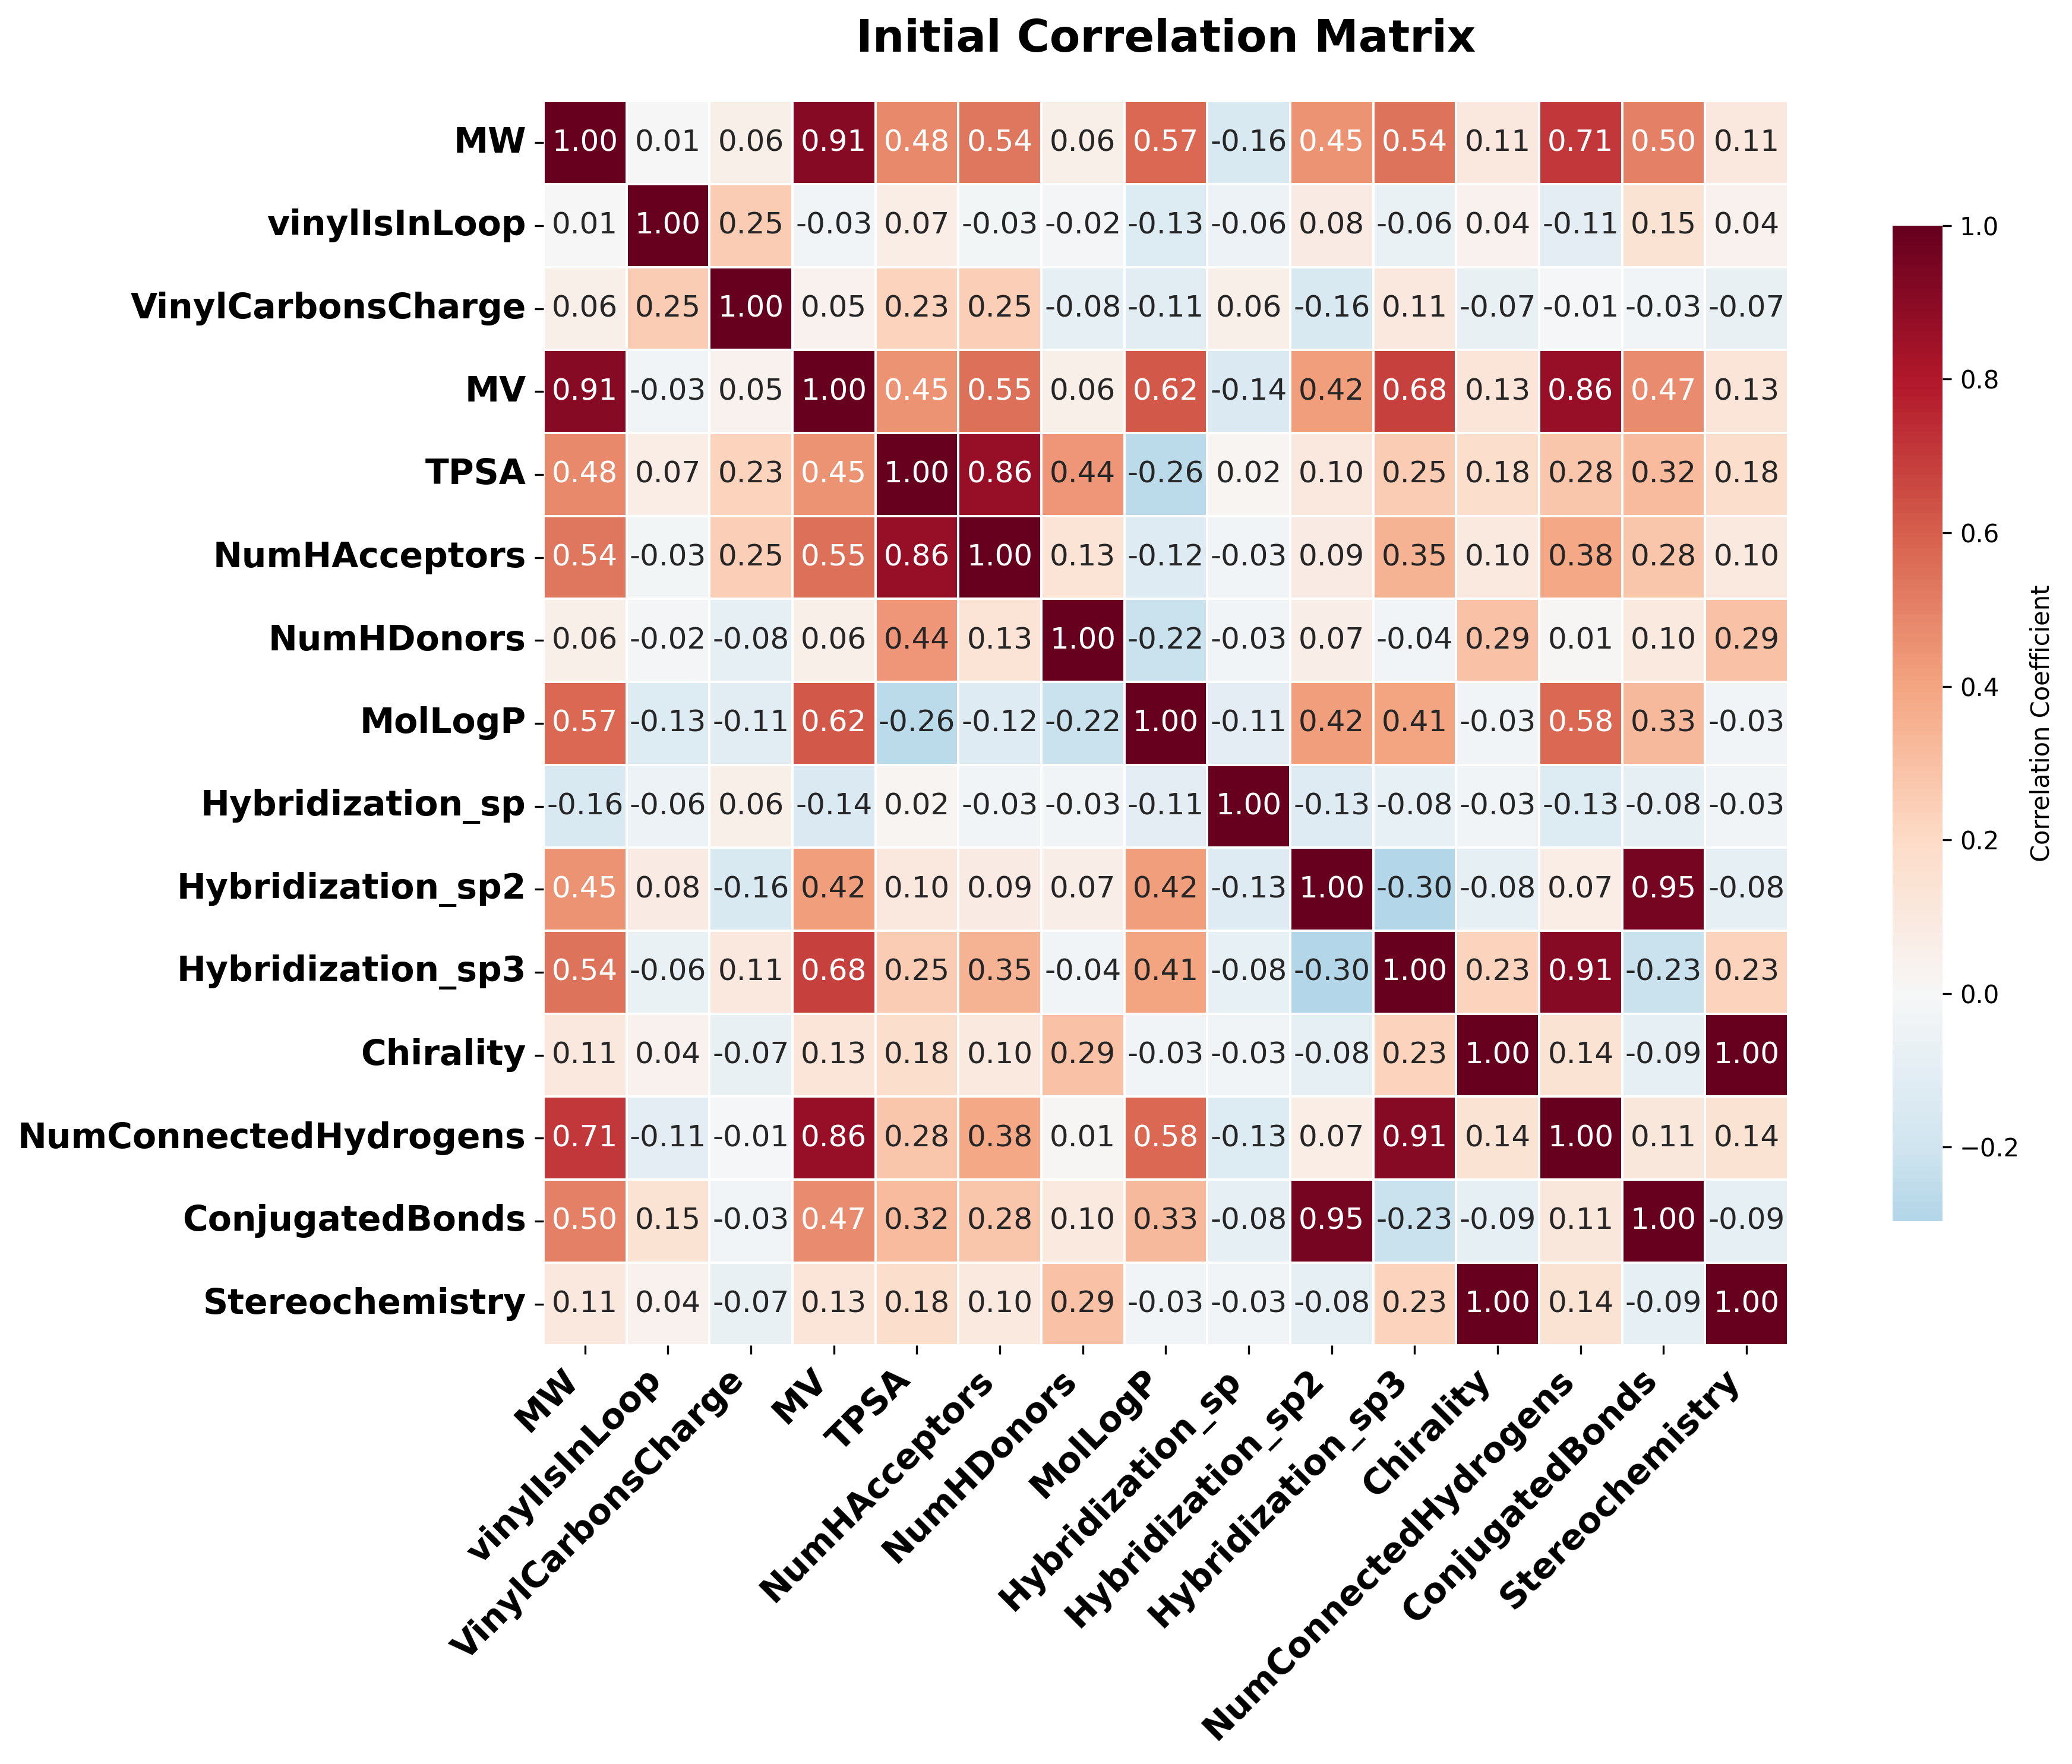


CORRELATION MATRIX ANALYSIS

Highly Correlated Feature Pairs (|r| >= 0.7):
--------------------------------------------------------------------------------
Feature 1                 Feature 2                  Correlation
--------------------------------------------------------------------------------
Chirality                 Stereochemistry                  1.000
Hybridization_sp2         ConjugatedBonds                  0.951
MW                        MV                               0.910
Hybridization_sp3         NumConnectedHydrogens            0.906
MV                        NumConnectedHydrogens            0.864
TPSA                      NumHAcceptors                    0.863
MW                        NumConnectedHydrogens            0.710

Correlation Matrix Summary:
  - Matrix size: 15 × 15
  - Number of feature pairs: 105
  - Highly correlated pairs (|r| >= 0.7): 7
  - Mean absolute correlation: 0.235
  - Max absolute correlation: 1.000
  - Min absolute correlation: 0.006

A

In [2]:
'''
Initial Correlation Matrix Visualization for Molecular Descriptors
================================================================

This code creates a publication-ready correlation heatmap showing relationships between
all 15 original molecular descriptors. This figure demonstrates the need for feature
selection by revealing highly correlated descriptors that provide redundant information.

CUSTOMIZATION OPTIONS:
=====================
- Font sizes for titles, labels, and annotations
- Color scheme for correlation values
- Figure size and resolution
- Annotation precision and styling
- Axis label rotation and positioning
- Save option (commented out by default)
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CUSTOMIZATION PARAMETERS - Adjust these for your preferences
# =============================================================================

# FONT SIZES - Controls text size throughout the figure
TITLE_FONT_SIZE = 18          # Size of main title
AXIS_LABEL_FONT_SIZE = 14     # Size of axis labels (feature names)
ANNOTATION_FONT_SIZE = 12     # Size of correlation values in cells
COLORBAR_LABEL_SIZE = 14      # Size of colorbar labels

# FONT STYLES - Controls whether text appears bold or normal
TITLE_FONT_WEIGHT = 'bold'    # Title font weight: 'bold' or 'normal'
AXIS_LABEL_FONT_WEIGHT = 'bold'  # Axis label font weight: 'bold' or 'normal'

# COLORS - Visual appearance of correlation heatmap
COLORMAP = 'RdBu_r'           # Colormap for correlations: 'RdBu_r', 'coolwarm', 'seismic'
CENTER_VALUE = 0              # Center point for color scale (usually 0 for correlations)

# FIGURE DIMENSIONS - Overall size and quality
FIGURE_SIZE = (14, 10)        # Figure width and height in inches (width, height)
DPI = 300                     # Resolution: 300 for publication, 150 for screen

# HEATMAP STYLING - Appearance of correlation matrix
CELL_LINE_WIDTH = 0.5         # Width of lines between cells
ANNOTATION_FORMAT = '.2f'     # Decimal places for correlation values (.2f = 2 decimal places)
COLORBAR_SHRINK = 0.8         # Size of colorbar (0.8 = 80% of plot height)

# AXIS ROTATION - Control label orientation
X_AXIS_ROTATION = 45          # Rotation angle for x-axis labels (degrees)
Y_AXIS_ROTATION = 0           # Rotation angle for y-axis labels (degrees)

# SAVE OPTIONS - File saving configuration
SAVE_FILENAME = 'initial_correlation_matrix.png'    # Default filename
SAVE_FORMAT = 'png'           # File format: 'png', 'pdf', 'svg', 'jpg'
SAVE_BBOX = 'tight'           # Bounding box: 'tight' or 'standard'
SAVE_FACECOLOR = 'white'      # Background color for saved figure

def create_correlation_matrix(df, features, save_path=None):
    """
    Create a correlation matrix heatmap for the given features
    
    Parameters:
    df: pandas DataFrame containing the data
    features: list of feature names to include in correlation matrix
    save_path: optional path to save the figure (None = don't save)
    """
    
    # Calculate correlation matrix
    correlation_matrix = df[features].corr()
    
    # Create figure
    plt.figure(figsize=FIGURE_SIZE, dpi=DPI)
    plt.style.use('default')
    
    # Create heatmap
    heatmap = sns.heatmap(
        correlation_matrix,
        annot=True,                          # Show correlation values
        fmt=ANNOTATION_FORMAT,               # Format for correlation values
        cmap=COLORMAP,                       # Color scheme
        center=CENTER_VALUE,                 # Center point for colors
        square=True,                         # Make cells square
        linewidths=CELL_LINE_WIDTH,          # Lines between cells
        cbar_kws={'shrink': COLORBAR_SHRINK, 'label': 'Correlation Coefficient'},
        annot_kws={'size': ANNOTATION_FONT_SIZE}
    )
    
    # Customize title
    plt.title('Initial Correlation Matrix', 
             fontsize=TITLE_FONT_SIZE, 
             fontweight=TITLE_FONT_WEIGHT, 
             pad=20)
    
    # Customize axis labels
    plt.xlabel('')  # Remove default xlabel
    plt.ylabel('')  # Remove default ylabel
    
    # Rotate and style axis labels
    plt.xticks(rotation=X_AXIS_ROTATION, ha='right', 
              fontsize=AXIS_LABEL_FONT_SIZE, 
              fontweight=AXIS_LABEL_FONT_WEIGHT)
    plt.yticks(rotation=Y_AXIS_ROTATION, 
              fontsize=AXIS_LABEL_FONT_SIZE, 
              fontweight=AXIS_LABEL_FONT_WEIGHT)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save figure if path provided
    if save_path:
        plt.savefig(save_path, 
                   dpi=DPI, 
                   bbox_inches=SAVE_BBOX, 
                   facecolor=SAVE_FACECOLOR,
                   format=SAVE_FORMAT)
        print(f"Figure saved to: {save_path}")
    
    # Show plot
    plt.show()
    
    return correlation_matrix

def print_correlation_analysis(correlation_matrix, threshold=0.7):
    """
    Print analysis of highly correlated features
    
    Parameters:
    correlation_matrix: pandas DataFrame with correlation values
    threshold: correlation threshold for identifying highly correlated pairs
    """
    print(f"\n{'='*60}")
    print("CORRELATION MATRIX ANALYSIS")
    print(f"{'='*60}")
    
    # Find highly correlated pairs
    high_corr_pairs = []
    features = correlation_matrix.columns
    
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) >= threshold:
                high_corr_pairs.append({
                    'Feature 1': features[i],
                    'Feature 2': features[j],
                    'Correlation': corr_value
                })
    
    # Sort by absolute correlation value
    high_corr_pairs.sort(key=lambda x: abs(x['Correlation']), reverse=True)
    
    print(f"\nHighly Correlated Feature Pairs (|r| >= {threshold}):")
    print("-" * 80)
    print(f"{'Feature 1':<25} {'Feature 2':<25} {'Correlation':>12}")
    print("-" * 80)
    
    for pair in high_corr_pairs:
        print(f"{pair['Feature 1']:<25} {pair['Feature 2']:<25} {pair['Correlation']:>12.3f}")
    
    if not high_corr_pairs:
        print(f"No feature pairs found with |correlation| >= {threshold}")
    
    # Print summary statistics
    print(f"\nCorrelation Matrix Summary:")
    print(f"  - Matrix size: {correlation_matrix.shape[0]} × {correlation_matrix.shape[1]}")
    print(f"  - Number of feature pairs: {len(features) * (len(features) - 1) // 2}")
    print(f"  - Highly correlated pairs (|r| >= {threshold}): {len(high_corr_pairs)}")
    
    # Print some basic statistics
    # Get upper triangle of correlation matrix (excluding diagonal)
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    correlations = upper_triangle.stack().values
    
    print(f"  - Mean absolute correlation: {np.mean(np.abs(correlations)):.3f}")
    print(f"  - Max absolute correlation: {np.max(np.abs(correlations)):.3f}")
    print(f"  - Min absolute correlation: {np.min(np.abs(correlations)):.3f}")

# Main execution
if __name__ == "__main__":
    # Load data
    file_path = r'/work/bavarian/hsafari2/Manuscript Code/UniqueMonomersProperties.xlsx'
    df = pd.read_excel(file_path)
    
    # Define all original features (15 features)
    original_features = [
        'MW',                      # Molecular Weight
        'vinylIsInLoop',           # Vinyl Is In Loop
        'VinylCarbonsCharge',      # Vinyl Carbons Charge
        'MV',                      # Molecular Volume
        'TPSA',                    # Total Polar Surface Area
        'NumHAcceptors',           # Number of H Acceptors
        'NumHDonors',              # Number of H Donors
        'MolLogP',                 # Molecular LogP
        'Hybridization_sp',        # Hybridization sp
        'Hybridization_sp2',       # Hybridization sp2
        'Hybridization_sp3',       # Hybridization sp3
        'Chirality',               # Chirality
        'NumConnectedHydrogens',   # Num Connected H
        'ConjugatedBonds',         # Conjugated Bonds
        'Stereochemistry'          # Stereochemistry
    ]
    
    print("Creating correlation matrix visualization...")
    print(f"Features included: {len(original_features)}")
    
    # Create correlation matrix WITHOUT saving (default)
    correlation_matrix = create_correlation_matrix(
        df, 
        original_features
        # save_path=None  # No saving by default
    )
    
    # UNCOMMENT THE LINES BELOW TO SAVE THE FIGURE:
    # correlation_matrix = create_correlation_matrix(
    #     df, 
    #     original_features, 
    #     save_path=SAVE_FILENAME  # This will save the figure
    # )
    '''
    # Alternative: Save with custom filename
    correlation_matrix = create_correlation_matrix(
        df, 
         original_features, 
         save_path='correlation_matrix_custom.png'
     )
    '''
    # Print detailed analysis
    print_correlation_analysis(correlation_matrix, threshold=0.7)
    
    # Also show analysis with different thresholds
    print("\n" + "="*60)
    print("ADDITIONAL CORRELATION THRESHOLDS:")
    print("="*60)
    
    for threshold in [0.8, 0.9, 0.95]:
        high_corr_count = 0
        features = correlation_matrix.columns
        
        for i in range(len(features)):
            for j in range(i+1, len(features)):
                if abs(correlation_matrix.iloc[i, j]) >= threshold:
                    high_corr_count += 1
        
        print(f"Pairs with |correlation| >= {threshold}: {high_corr_count}")
    
    print(f"\nTo save the figure, uncomment the save options in the main execution section.")
    print(f"Default save filename: {SAVE_FILENAME}")
    print(f"Default save format: {SAVE_FORMAT}")

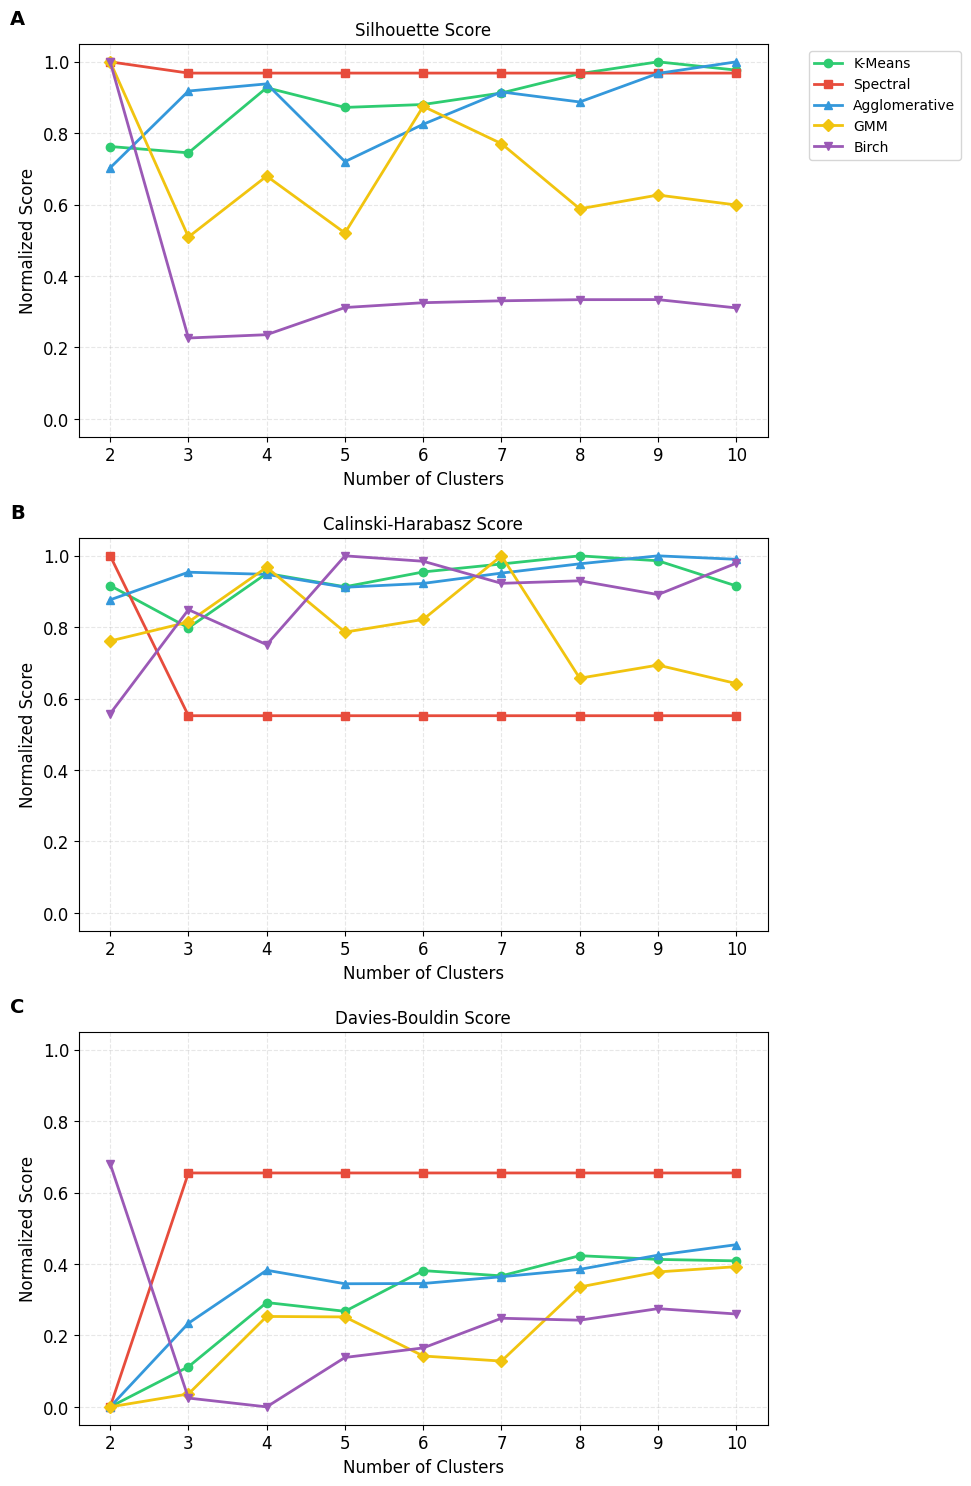

In [3]:
'''
Clustering Optimization for Monomer Classification
This code evaluates multiple clustering algorithms to determine the optimal approach for monomer classification, 
as detailed in Section 2 of the Supporting Information. Five clustering methods (K-Means, Spectral, 
Agglomerative, GMM, and BIRCH) are systematically assessed across different numbers of clusters (2-10) 
using three complementary evaluation metrics: Silhouette score, Calinski-Harabasz index, and Davies-Bouldin 
index. The normalized visualizations support the selection of spectral clustering with three clusters 
as the optimal configuration for our predictive framework.
'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import (KMeans, SpectralClustering, AgglomerativeClustering, 
                           Birch, AffinityPropagation, OPTICS)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, 
                           davies_bouldin_score)
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Set publication-quality plotting parameters
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'legend.fontsize': 10
})

# Load and prepare data
'Here, please use the  Monomer Physicochemical Features excel file that is shared with you.'

file_path = r'/work/bavarian/hsafari2/Manuscript Code/UniqueMonomersProperties.xlsx'
df = pd.read_excel(file_path)

# Selected features
features = df[['MW', 'vinylIsInLoop', 'VinylCarbonsCharge', 'TPSA', 
               'NumHDonors', 'MolLogP', 'Hybridization_sp2', 'Stereochemistry']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize dictionaries for scores
scores = {
    'Silhouette': {},
    'Calinski-Harabasz': {},
    'Davies-Bouldin': {}
}

# Cluster range
cluster_range = range(2, 11)

# Function to initialize clusterer with appropriate parameters
def get_clusterer(method_name, k):
    if method_name == 'K-Means':
        return KMeans(n_clusters=k, random_state=42)
    elif method_name == 'Spectral':
        return SpectralClustering(n_clusters=k, random_state=42)
    elif method_name == 'Agglomerative':
        return AgglomerativeClustering(n_clusters=k)
    elif method_name == 'GMM':
        return GaussianMixture(n_components=k, random_state=42)
    elif method_name == 'Birch':
        return Birch(n_clusters=k)
    elif method_name == 'OPTICS':
        return OPTICS(min_samples=5, min_cluster_size=k)
    elif method_name == 'Affinity Propagation':
        return AffinityPropagation(preference=-50, random_state=42)

# List of methods to evaluate
methods = ['K-Means', 'Spectral', 'Agglomerative', 'GMM', 'Birch']

# Calculate scores for each method and metric
for method_name in methods:
    scores['Silhouette'][method_name] = []
    scores['Calinski-Harabasz'][method_name] = []
    scores['Davies-Bouldin'][method_name] = []
    
    for k in cluster_range:
        clusterer = get_clusterer(method_name, k)
        labels = clusterer.fit_predict(scaled_features)
        
        if len(set(labels)) > 1:
            scores['Silhouette'][method_name].append(
                silhouette_score(scaled_features, labels))
            scores['Calinski-Harabasz'][method_name].append(
                calinski_harabasz_score(scaled_features, labels))
            scores['Davies-Bouldin'][method_name].append(
                davies_bouldin_score(scaled_features, labels))
        else:
            for metric in scores:
                scores[metric][method_name].append(np.nan)

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f1c40f', '#9b59b6']
markers = ['o', 's', '^', 'D', 'v']

# Plot titles
titles = ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']

# Plot each metric
for ax, (metric, metric_scores), title in zip([ax1, ax2, ax3], scores.items(), titles):
    for (method, method_scores), color, marker in zip(metric_scores.items(), 
                                                     colors, markers):
        valid_scores = [score for score in method_scores if not np.isnan(score)]
        valid_range = [k for k, score in zip(cluster_range, method_scores) 
                      if not np.isnan(score)]
        
        if valid_scores:
            if metric == 'Davies-Bouldin':
                # Invert and normalize Davies-Bouldin scores
                normalized_scores = 1 - (np.array(valid_scores) / np.max(valid_scores))
            else:
                # Normalize other scores
                normalized_scores = np.array(valid_scores) / np.max(valid_scores)
            
            ax.plot(valid_range, normalized_scores, label=method, marker=marker,
                   linewidth=2, markersize=6, color=color)
    
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel(f'Normalized Score')
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_ylim(-0.05, 1.05)

# Add subplot labels
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(-0.1, 1.05, chr(65+i), transform=ax.transAxes, 
            size=14, weight='bold')

# Add legend to the first subplot only
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('clustering_optimization.png', dpi=300, bbox_inches='tight')
#plt.savefig('clustering_optimization.pdf', bbox_inches='tight')
plt.show()

Creating clustering visualization with characteristic-based stable labels...
Using characteristic-based cluster assignment...

Current cluster characteristics:
  Cluster 1: vinylIsInLoop=0.000, MW=0.238, MolLogP=0.537
  Cluster 2: vinylIsInLoop=1.000, MW=0.205, MolLogP=0.415
  Cluster 3: vinylIsInLoop=0.000, MW=0.179, MolLogP=0.430

Cluster reassignment applied:
  Old 2 -> New 3 (Green, highest vinylIsInLoop)
  Old 1 -> New 2 (Blue, highest MolLogP)
  Old 3 -> New 1 (Red, remaining)

CLUSTER ANALYSIS RESULTS (3 clusters)

Cluster Sizes:
  Cluster 1:  343 monomers (54.6%)
  Cluster 2:  234 monomers (37.3%)
  Cluster 3:   51 monomers (8.1%)

Average Feature Values by Cluster:
Feature              Cluster 1 Cluster 2 Cluster 3
--------------------------------------------------
MW                      0.179    0.238    0.205
vinylIsInLoop           0.000    0.000    1.000
VinylCarbonsCharge      0.195    0.136    0.264
TPSA                    0.211    0.192    0.241
NumHDonors             

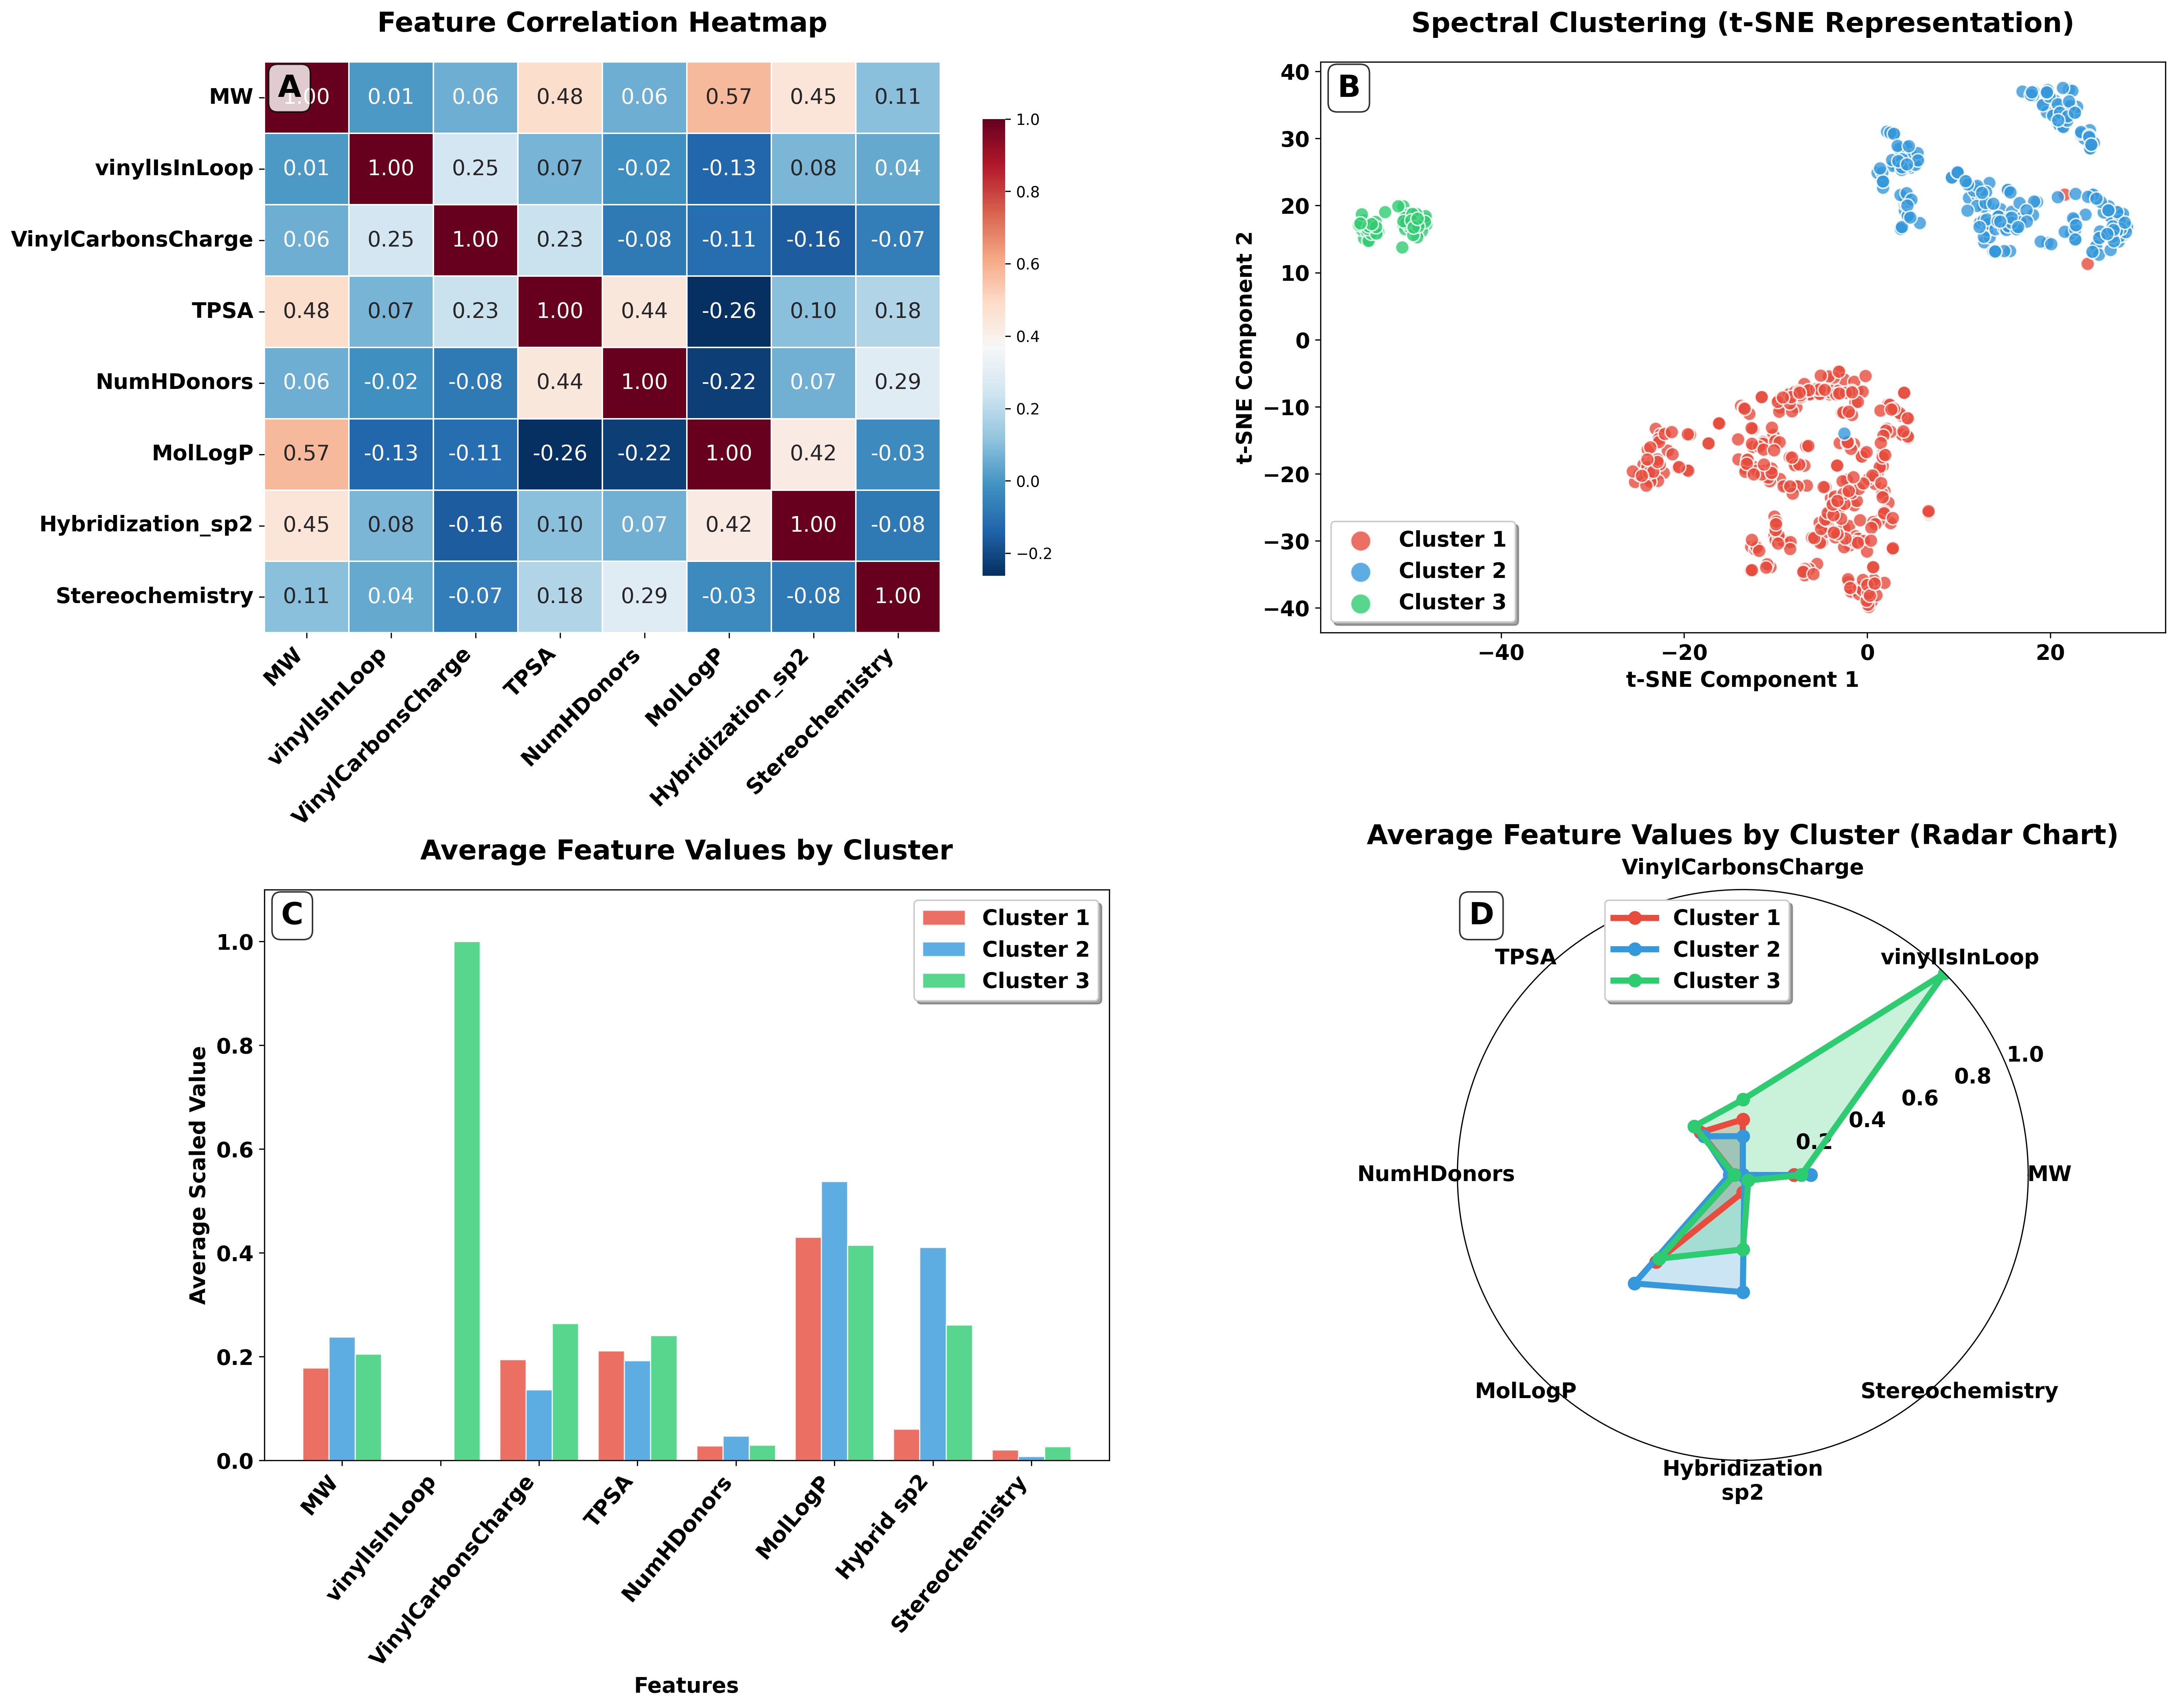

In [2]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# Suppress convergence warnings
warnings.simplefilter('ignore', category=UserWarning)

# =============================================================================
# CUSTOMIZATION PARAMETERS - Adjust these for your preferences
# =============================================================================

# FONT SIZES - Controls text size throughout the figure
TITLE_FONT_SIZE = 18          
AXIS_LABEL_FONT_SIZE = 14     
TICK_LABEL_FONT_SIZE = 14     
LEGEND_FONT_SIZE = 14         
PANEL_LABEL_FONT_SIZE = 20    

# FONT STYLES - Controls whether text appears bold or normal
TITLE_FONT_WEIGHT = 'bold'    
AXIS_LABEL_FONT_WEIGHT = 'bold'  
TICK_LABEL_FONT_WEIGHT = 'bold'  
LEGEND_FONT_WEIGHT = 'bold'      
RADAR_LABEL_FONT_WEIGHT = 'bold'   

# COLORS - Visual appearance of clusters and plots
CLUSTER_COLORS = ['#E74C3C', '#3498DB', '#2ECC71']  # Red, Blue, Green
HEATMAP_COLORMAP = 'RdBu_r'   

# FIGURE DIMENSIONS - Overall size and quality
FIGURE_SIZE = (20, 16)        
DPI = 300                     

# SUBPLOT SPACING - Control spacing between panels
VERTICAL_SPACING = 0.45       
HORIZONTAL_SPACING = 0.25     

# SCATTER PLOT STYLING - Appearance of points in t-SNE plot
SCATTER_POINT_SIZE = 80       
SCATTER_ALPHA = 0.8           
SCATTER_EDGE_WIDTH = 1.0      
SCATTER_EDGE_COLOR = 'white'  

# GRID CONTROLS - Show/hide and style grid lines
SHOW_GRID = False              
GRID_ALPHA = 0.3              
GRID_LINESTYLE = '--'         

# BAR CHART AND RADAR STYLING - Appearance of charts
BAR_WIDTH = 0.8              
RADAR_FILL_ALPHA = 0.25       
RADAR_LINE_WIDTH = 4          

# RADAR CHART LEGEND POSITIONING - Control legend placement to avoid overlap
RADAR_LEGEND_X = 0.6          
RADAR_LEGEND_Y = 1.0          

# PANEL LABELS STYLING - Appearance of A, B, C, D labels
PANEL_LABEL_COLOR = 'black'   
PANEL_LABEL_WEIGHT = 'bold'   
PANEL_LABEL_BBOX = dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8)

# =============================================================================
# CLUSTER STABILIZATION FUNCTIONS
# =============================================================================

def save_reference_centroids(centroids, filename='reference_centroids.pkl'):
    """Save reference centroids to file"""
    with open(filename, 'wb') as f:
        pickle.dump(centroids, f)
    print(f"Reference centroids saved to {filename}")

def load_reference_centroids(filename='reference_centroids.pkl'):
    """Load reference centroids from file"""
    try:
        with open(filename, 'rb') as f:
            centroids = pickle.load(f)
        print(f"Reference centroids loaded from {filename}")
        return centroids
    except FileNotFoundError:
        print(f"No reference file found. Will create new reference.")
        return None

def stabilize_cluster_labels(scaled_features, cluster_labels, reference_centroids=None):
    """
    Stabilize cluster labels by matching centroids to a reference
    """
    n_clusters = len(np.unique(cluster_labels))
    
    # Calculate current centroids
    current_centroids = []
    for i in range(n_clusters):
        mask = cluster_labels == i
        if np.any(mask):  # Make sure cluster is not empty
            centroid = scaled_features[mask].mean(axis=0)
            current_centroids.append(centroid)
    current_centroids = np.array(current_centroids)
    
    # If no reference, use current as reference (first run)
    if reference_centroids is None:
        print("Creating new reference centroids")
        return cluster_labels, current_centroids
    
    # Find best matching between current and reference centroids
    distances = cdist(current_centroids, reference_centroids)
    
    # Use Hungarian algorithm for optimal assignment
    row_indices, col_indices = linear_sum_assignment(distances)
    
    # Create label mapping
    label_mapping = {row_indices[i]: col_indices[i] for i in range(len(row_indices))}
    
    # Apply mapping to cluster labels
    stable_labels = np.array([label_mapping[label] for label in cluster_labels])
    
    print("Cluster labels stabilized using reference centroids")
    return stable_labels, reference_centroids

def force_cluster_assignment_by_characteristics(scaled_df, features):
    """
    Force cluster assignments based on dominant characteristics to match your figure
    
    Based on your corrections:
    - Cluster 1 (Red): Correct as is
    - Cluster 2 (Blue): High MolLogP 
    - Cluster 3 (Green): High vinylIsInLoop (~1.0)
    """
    cluster_means = scaled_df.groupby('Cluster')[features].mean()
    
    print("\nCurrent cluster characteristics:")
    for cluster in cluster_means.index:
        vinyl_val = cluster_means.loc[cluster, 'vinylIsInLoop']
        mw_val = cluster_means.loc[cluster, 'MW']
        mollogp_val = cluster_means.loc[cluster, 'MolLogP']
        print(f"  Cluster {cluster}: vinylIsInLoop={vinyl_val:.3f}, MW={mw_val:.3f}, MolLogP={mollogp_val:.3f}")
    
    # Find cluster with highest vinylIsInLoop - this should be Cluster 3 (green)
    highest_vinyl_cluster = cluster_means['vinylIsInLoop'].idxmax()
    
    # Find cluster with highest MolLogP among the remaining - this should be Cluster 2 (blue)
    remaining_clusters = [c for c in cluster_means.index if c != highest_vinyl_cluster]
    remaining_means = cluster_means.loc[remaining_clusters]
    highest_mollogp_cluster = remaining_means['MolLogP'].idxmax()
    
    # The remaining cluster should be Cluster 1 (red)
    remaining_cluster = [c for c in cluster_means.index if c not in [highest_vinyl_cluster, highest_mollogp_cluster]][0]
    
    # Create mapping: current_cluster -> desired_cluster
    cluster_mapping = {
        highest_vinyl_cluster: 3,      # Green - highest vinylIsInLoop
        highest_mollogp_cluster: 2,    # Blue - highest MolLogP among remaining  
        remaining_cluster: 1           # Red - remaining
    }
    
    # Apply the mapping
    scaled_df['Cluster'] = scaled_df['Cluster'].map(cluster_mapping)
    
    print(f"\nCluster reassignment applied:")
    print(f"  Old {highest_vinyl_cluster} -> New 3 (Green, highest vinylIsInLoop)")
    print(f"  Old {highest_mollogp_cluster} -> New 2 (Blue, highest MolLogP)")  
    print(f"  Old {remaining_cluster} -> New 1 (Red, remaining)")
    
    return scaled_df

def plot_clustering_analysis(df, features, n_clusters, reference_file='reference_centroids.pkl', 
                           force_characteristics=True):
    """
    Create enhanced clustering analysis visualization with stable cluster labels
    
    Parameters:
    df: pandas DataFrame containing the data
    features: list of feature names to use for clustering
    n_clusters: number of clusters to create
    reference_file: filename to store/load reference centroids for label stability
    force_characteristics: if True, force cluster assignment based on characteristics
    """
    
    # Use predefined colors for consistency
    cluster_colors = CLUSTER_COLORS[:n_clusters]
    
    # MinMax scaling for each feature
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(df[features])
    
    # Create a DataFrame with scaled features
    scaled_df = pd.DataFrame(scaled_features, columns=features)

    # Perform spectral clustering
    spectral = SpectralClustering(n_clusters=n_clusters, 
                                 random_state=42, 
                                 affinity='nearest_neighbors',
                                 n_neighbors=10,  
                                 assign_labels='kmeans')
    initial_labels = spectral.fit_predict(scaled_features)
    
    if force_characteristics:
        # Use characteristic-based assignment instead of centroids
        print("Using characteristic-based cluster assignment...")
        scaled_df['Cluster'] = initial_labels + 1
        scaled_df = force_cluster_assignment_by_characteristics(scaled_df, features)
    else:
        # Use centroid-based stabilization
        reference_centroids = load_reference_centroids(reference_file)
        stable_labels, current_centroids = stabilize_cluster_labels(
            scaled_features, initial_labels, reference_centroids
        )
        if reference_centroids is None:
            save_reference_centroids(current_centroids, reference_file)
        scaled_df['Cluster'] = stable_labels + 1

    # Apply t-SNE with improved parameters
    tsne = TSNE(
        n_components=2,
        perplexity=30,
        early_exaggeration=12,
        learning_rate=200,
        n_iter=3000,
        min_grad_norm=1e-7,
        random_state=42,
        metric='euclidean'
    )
    tsne_results = tsne.fit_transform(scaled_features)
    scaled_df['TSNE1'] = tsne_results[:, 0]
    scaled_df['TSNE2'] = tsne_results[:, 1]

    # Create the figure with enhanced styling
    plt.style.use('default')  # Ensure clean styling
    fig, axes = plt.subplots(2, 2, figsize=FIGURE_SIZE, dpi=DPI)
    fig.patch.set_facecolor('white')
    
    # Adjust spacing between subplots
    plt.subplots_adjust(left=0.08, bottom=0.12, right=0.95, top=0.92, 
                       wspace=HORIZONTAL_SPACING, hspace=VERTICAL_SPACING)

    # Panel A: Feature Correlation Heatmap (top-left)
    corr = scaled_df[features].corr()
    im = sns.heatmap(corr, annot=True, cmap=HEATMAP_COLORMAP, ax=axes[0, 0], 
                     fmt='.2f', linewidths=0.5, annot_kws={"size": TICK_LABEL_FONT_SIZE},
                     cbar_kws={'shrink': 0.8})
    axes[0, 0].set_title('Feature Correlation Heatmap', fontsize=TITLE_FONT_SIZE, 
                        fontweight=TITLE_FONT_WEIGHT, pad=20)
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right', 
                              fontsize=TICK_LABEL_FONT_SIZE, fontweight=TICK_LABEL_FONT_WEIGHT)
    axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), rotation=0, 
                              fontsize=TICK_LABEL_FONT_SIZE, fontweight=TICK_LABEL_FONT_WEIGHT)
    
    # Add panel label A
    axes[0, 0].text(0.02, 0.98, 'A', transform=axes[0, 0].transAxes, fontsize=PANEL_LABEL_FONT_SIZE, 
                   fontweight=PANEL_LABEL_WEIGHT, color=PANEL_LABEL_COLOR, va='top', ha='left',
                   bbox=PANEL_LABEL_BBOX)

    # Panel B: t-SNE Clustering Visualization (top-right)
    for cluster in range(1, n_clusters + 1):
        cluster_data = scaled_df[scaled_df['Cluster'] == cluster]
        axes[0, 1].scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], 
                          c=cluster_colors[cluster-1], 
                          label=f'Cluster {cluster}', 
                          alpha=SCATTER_ALPHA, 
                          s=SCATTER_POINT_SIZE,
                          edgecolors=SCATTER_EDGE_COLOR,
                          linewidth=SCATTER_EDGE_WIDTH)
    
    axes[0, 1].set_title('Spectral Clustering (t-SNE Representation)', 
                        fontsize=TITLE_FONT_SIZE, fontweight=TITLE_FONT_WEIGHT, pad=20)
    axes[0, 1].set_xlabel('t-SNE Component 1', fontsize=AXIS_LABEL_FONT_SIZE, 
                         fontweight=AXIS_LABEL_FONT_WEIGHT)
    axes[0, 1].set_ylabel('t-SNE Component 2', fontsize=AXIS_LABEL_FONT_SIZE, 
                         fontweight=AXIS_LABEL_FONT_WEIGHT)
    
    # Create legend with custom font weight
    legend = axes[0, 1].legend(fontsize=LEGEND_FONT_SIZE, markerscale=1.5, frameon=True, 
                              fancybox=True, shadow=True)
    for text in legend.get_texts():
        text.set_fontweight(LEGEND_FONT_WEIGHT)
    
    # Apply grid settings
    if SHOW_GRID:
        axes[0, 1].grid(True, linestyle=GRID_LINESTYLE, alpha=GRID_ALPHA)
    
    axes[0, 1].tick_params(labelsize=TICK_LABEL_FONT_SIZE)
    # Apply font weight to tick labels
    for label in axes[0, 1].get_xticklabels():
        label.set_fontweight(TICK_LABEL_FONT_WEIGHT)
    for label in axes[0, 1].get_yticklabels():
        label.set_fontweight(TICK_LABEL_FONT_WEIGHT)
    
    # Add panel label B
    axes[0, 1].text(0.02, 0.98, 'B', transform=axes[0, 1].transAxes, fontsize=PANEL_LABEL_FONT_SIZE, 
                   fontweight=PANEL_LABEL_WEIGHT, color=PANEL_LABEL_COLOR, va='top', ha='left',
                   bbox=PANEL_LABEL_BBOX)

    # Panel C: Average Feature Values Bar Chart (bottom-left)
    feature_means = scaled_df.groupby('Cluster')[features].mean()
    
    x = np.arange(len(features))
    bar_width = BAR_WIDTH / n_clusters
    
    for i, cluster in enumerate(range(1, n_clusters + 1)):
        offset = (i - (n_clusters-1)/2) * bar_width
        bars = axes[1, 0].bar(x + offset, feature_means.loc[cluster], 
                             bar_width, label=f'Cluster {cluster}',
                             color=cluster_colors[i], alpha=0.8, 
                             edgecolor='white', linewidth=0.8)
    
    axes[1, 0].set_title('Average Feature Values by Cluster', fontsize=TITLE_FONT_SIZE, 
                        fontweight=TITLE_FONT_WEIGHT, pad=20)
    axes[1, 0].set_xlabel('Features', fontsize=AXIS_LABEL_FONT_SIZE, 
                         fontweight=AXIS_LABEL_FONT_WEIGHT)
    axes[1, 0].set_ylabel('Average Scaled Value', fontsize=AXIS_LABEL_FONT_SIZE, 
                         fontweight=AXIS_LABEL_FONT_WEIGHT)
    axes[1, 0].set_xticks(x)
    
    # Improve feature labels
    feature_labels_short = [f.replace('_', ' ').replace('Hybridization', 'Hybrid') for f in features]
    axes[1, 0].set_xticklabels(feature_labels_short, rotation=50, ha='right', 
                              fontsize=TICK_LABEL_FONT_SIZE-1, fontweight=TICK_LABEL_FONT_WEIGHT)
    
    # Create legend with custom font weight
    legend = axes[1, 0].legend(fontsize=LEGEND_FONT_SIZE, frameon=True, fancybox=True, shadow=True)
    for text in legend.get_texts():
        text.set_fontweight(LEGEND_FONT_WEIGHT)
    
    # Apply grid settings
    if SHOW_GRID:
        axes[1, 0].grid(True, axis='y', linestyle=GRID_LINESTYLE, alpha=GRID_ALPHA)
    
    axes[1, 0].set_ylim(0, 1.1)
    axes[1, 0].tick_params(labelsize=TICK_LABEL_FONT_SIZE)
    
    # Apply font weight to tick labels
    for label in axes[1, 0].get_yticklabels():
        label.set_fontweight(TICK_LABEL_FONT_WEIGHT)
    
    # Add panel label C
    axes[1, 0].text(0.02, 0.98, 'C', transform=axes[1, 0].transAxes, fontsize=PANEL_LABEL_FONT_SIZE, 
                   fontweight=PANEL_LABEL_WEIGHT, color=PANEL_LABEL_COLOR, va='top', ha='left',
                   bbox=PANEL_LABEL_BBOX)

    # Panel D: Radar Chart (bottom-right)
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    # Create polar subplot
    axes[1, 1].remove()  # Remove the regular axes
    axes[1, 1] = plt.subplot(2, 2, 4, polar=True)
    
    for i in range(n_clusters):
        cluster_means = feature_means.iloc[i]
        values = np.concatenate((cluster_means, [cluster_means.iloc[0]]))
        
        # Plot lines and fill areas
        axes[1, 1].plot(angles, values, 'o-', linewidth=RADAR_LINE_WIDTH, 
                       label=f'Cluster {i+1}', color=cluster_colors[i], 
                       markersize=8)
        axes[1, 1].fill(angles, values, alpha=RADAR_FILL_ALPHA, 
                       color=cluster_colors[i])
    
    axes[1, 1].set_ylim(0, 1)
    
    # Improve feature labels for radar chart
    feature_labels_radar = [f.replace('_', '\n') for f in features]
    axes[1, 1].set_thetagrids(angles[:-1] * 180/np.pi, feature_labels_radar, 
                             fontsize=TICK_LABEL_FONT_SIZE, fontweight=RADAR_LABEL_FONT_WEIGHT)
    axes[1, 1].set_title('Average Feature Values by Cluster (Radar Chart)', 
                        fontsize=TITLE_FONT_SIZE, fontweight=TITLE_FONT_WEIGHT, pad=30)
    
    # Create legend with custom font weight and positioning
    legend = axes[1, 1].legend(fontsize=LEGEND_FONT_SIZE, bbox_to_anchor=(RADAR_LEGEND_X, RADAR_LEGEND_Y), 
                              frameon=True, fancybox=True, shadow=True)
    for text in legend.get_texts():
        text.set_fontweight(LEGEND_FONT_WEIGHT)
    
    # Improve radial grid
    axes[1, 1].set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])
    axes[1, 1].tick_params(labelsize=TICK_LABEL_FONT_SIZE)
    
    # Apply grid settings for radar chart
    if SHOW_GRID:
        axes[1, 1].grid(True, alpha=GRID_ALPHA)
    else:
        axes[1, 1].grid(False)
    
    # Apply font weight to radial tick labels
    for label in axes[1, 1].get_yticklabels():
        label.set_fontweight(TICK_LABEL_FONT_WEIGHT)
    
    # Add panel label D
    axes[1, 1].text(0.02, 0.98, 'D', transform=axes[1, 1].transAxes, fontsize=PANEL_LABEL_FONT_SIZE, 
                   fontweight=PANEL_LABEL_WEIGHT, color=PANEL_LABEL_COLOR, va='top', ha='left',
                   bbox=PANEL_LABEL_BBOX)

    return fig, scaled_df

def print_cluster_statistics(scaled_df, features, n_clusters):
    """Print detailed cluster statistics"""
    print(f"\n{'='*60}")
    print(f"CLUSTER ANALYSIS RESULTS ({n_clusters} clusters)")
    print(f"{'='*60}")
    
    # Cluster sizes
    cluster_counts = scaled_df['Cluster'].value_counts().sort_index()
    print(f"\nCluster Sizes:")
    for cluster, count in cluster_counts.items():
        percentage = (count / len(scaled_df)) * 100
        print(f"  Cluster {cluster}: {count:4d} monomers ({percentage:.1f}%)")
    
    # Feature means by cluster
    feature_means = scaled_df.groupby('Cluster')[features].mean()
    print(f"\nAverage Feature Values by Cluster:")
    print(f"{'Feature':<20} " + " ".join([f"Cluster {i+1:1d}" for i in range(n_clusters)]))
    print("-" * (20 + 10 * n_clusters))
    
    for feature in features:
        values_str = " ".join([f"{feature_means.loc[i+1, feature]:8.3f}" for i in range(n_clusters)])
        print(f"{feature:<20} {values_str}")

def reset_reference_centroids(filename='reference_centroids.pkl'):
    """Delete the reference centroids file to start fresh"""
    import os
    try:
        os.remove(filename)
        print(f"Reference centroids file '{filename}' has been deleted. Next run will create new reference.")
    except FileNotFoundError:
        print(f"No reference file '{filename}' found to delete.")

# Example usage:
if __name__ == "__main__":
    # Load data
    df = pd.read_excel(r'/work/bavarian/hsafari2/Manuscript Code/UniqueMonomersProperties.xlsx')

    # Features for clustering
    features = ['MW', 'vinylIsInLoop', 'VinylCarbonsCharge', 'TPSA', 
               'NumHDonors', 'MolLogP', 'Hybridization_sp2',  
               'Stereochemistry']

    # Set number of clusters
    n_clusters = 3

    # Create the visualization with characteristic-based stable clustering
    print("Creating clustering visualization with characteristic-based stable labels...")
    fig, scaled_df = plot_clustering_analysis(df, features, n_clusters, 
                                            force_characteristics=True)
    
    # Print statistics
    print_cluster_statistics(scaled_df, features, n_clusters)
    
    # Save the figure (optional)
    # fig.savefig('clustering_analysis_stable.png', dpi=300, bbox_inches='tight', facecolor='white')
    
    # Show the plot
    plt.show()

In [22]:
'''
Monomer Clustering Implementation and Assignment
This code implements the final spectral clustering of monomers based on the optimal parameters 
identified in our previous analysis. Using the eight selected 
physicochemical descriptors, it assigns each monomer to one of three clusters and creates a 
mapping between the molecular SMILES representation and cluster labels. These cluster assignments 
are crucial for the subsequent analysis of reactivity ratios between different monomer groups, 
enabling the cluster-specific machine learning approach.
'''
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def force_cluster_assignment_by_characteristics(df, cluster_labels, features):
    """
    Force cluster assignments based on dominant characteristics to ensure consistency
    
    - Cluster 1 (Red): Remaining/intermediate cluster
    - Cluster 2 (Blue): High MolLogP 
    - Cluster 3 (Green): High vinylIsInLoop (~1.0)
    """
    # Create temporary dataframe with clusters
    temp_df = df.copy()
    temp_df['Cluster'] = cluster_labels
    
    # Calculate cluster means
    cluster_means = temp_df.groupby('Cluster')[features].mean()
    
    print("\nCurrent cluster characteristics:")
    for cluster in cluster_means.index:
        vinyl_val = cluster_means.loc[cluster, 'vinylIsInLoop']
        mw_val = cluster_means.loc[cluster, 'MW']
        mollogp_val = cluster_means.loc[cluster, 'MolLogP']
        print(f"  Cluster {cluster}: vinylIsInLoop={vinyl_val:.3f}, MW={mw_val:.3f}, MolLogP={mollogp_val:.3f}")
    
    # Find cluster with highest vinylIsInLoop - this should be Cluster 3 (green)
    highest_vinyl_cluster = cluster_means['vinylIsInLoop'].idxmax()
    
    # Find cluster with highest MolLogP among the remaining - this should be Cluster 2 (blue)
    remaining_clusters = [c for c in cluster_means.index if c != highest_vinyl_cluster]
    remaining_means = cluster_means.loc[remaining_clusters]
    highest_mollogp_cluster = remaining_means['MolLogP'].idxmax()
    
    # The remaining cluster should be Cluster 1 (red)
    remaining_cluster = [c for c in cluster_means.index if c not in [highest_vinyl_cluster, highest_mollogp_cluster]][0]
    
    # Create mapping: current_cluster -> desired_cluster
    cluster_mapping = {
        highest_vinyl_cluster: 3,      # Green - highest vinylIsInLoop
        highest_mollogp_cluster: 2,    # Blue - highest MolLogP among remaining  
        remaining_cluster: 1           # Red - remaining
    }
    
    # Apply the mapping
    reassigned_labels = np.array([cluster_mapping[label] for label in cluster_labels])
    
    print(f"\nCluster reassignment applied:")
    print(f"  Old {highest_vinyl_cluster} -> New 3 (Green, highest vinylIsInLoop)")
    print(f"  Old {highest_mollogp_cluster} -> New 2 (Blue, highest MolLogP)")  
    print(f"  Old {remaining_cluster} -> New 1 (Red, remaining)")
    
    return reassigned_labels

# Load data
df = pd.read_excel(r'/work/bavarian/hsafari2/Manuscript Code/UniqueMonomersProperties.xlsx')

# Define features and number of clusters
features = ['MW', 'vinylIsInLoop', 'VinylCarbonsCharge', 'TPSA', 
           'NumHDonors', 'MolLogP', 'Hybridization_sp2',  
           'Stereochemistry']
n_clusters = 3

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df[features])

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=n_clusters, 
                             random_state=42, 
                             affinity='nearest_neighbors',
                             n_neighbors=10,  
                             assign_labels='kmeans')
initial_cluster_labels = spectral.fit_predict(scaled_features) + 1

# Apply characteristic-based reassignment for consistency
print("Applying characteristic-based cluster assignment for consistency...")
stable_cluster_labels = force_cluster_assignment_by_characteristics(df, initial_cluster_labels, features)

# Create results DataFrame
results_df = pd.DataFrame({
    'SMILES': df['SMILES'],
    'Cluster': stable_cluster_labels
})

# Display cluster distribution
print("\nFinal Cluster Distribution:")
cluster_sizes = results_df['Cluster'].value_counts().sort_index()
for cluster, count in cluster_sizes.items():
    percentage = (count / len(results_df)) * 100
    print(f"  Cluster {cluster}: {count:4d} monomers ({percentage:.1f}%)")

# Display cluster characteristics
print("\nFinal Cluster Characteristics:")
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df['Cluster'] = stable_cluster_labels
feature_means = scaled_df.groupby('Cluster')[features].mean()

print(f"{'Feature':<20} " + " ".join([f"Cluster {i:1d}" for i in range(1, n_clusters+1)]))
print("-" * (20 + 10 * n_clusters))
for feature in features:
    values_str = " ".join([f"{feature_means.loc[i, feature]:8.3f}" for i in range(1, n_clusters+1)])
    print(f"{feature:<20} {values_str}")

# Display first few rows
print("\nFirst few rows of clustering results:")
print(results_df.head(10))

# Save to Excel
results_df.to_excel(r'/work/bavarian/hsafari2/Manuscript Code/SMILECluster.xlsx', index=False)
print(f"\nResults saved to SMILECluster.xlsx")
print(f"Total monomers processed: {len(results_df)}")

Applying characteristic-based cluster assignment for consistency...

Current cluster characteristics:
  Cluster 1: vinylIsInLoop=0.000, MW=209.260, MolLogP=2.760
  Cluster 2: vinylIsInLoop=1.000, MW=184.075, MolLogP=1.265
  Cluster 3: vinylIsInLoop=0.000, MW=164.088, MolLogP=1.455

Cluster reassignment applied:
  Old 2 -> New 3 (Green, highest vinylIsInLoop)
  Old 1 -> New 2 (Blue, highest MolLogP)
  Old 3 -> New 1 (Red, remaining)

Final Cluster Distribution:
  Cluster 1:  343 monomers (54.6%)
  Cluster 2:  234 monomers (37.3%)
  Cluster 3:   51 monomers (8.1%)

Final Cluster Characteristics:
Feature              Cluster 1 Cluster 2 Cluster 3
--------------------------------------------------
MW                      0.179    0.238    0.205
vinylIsInLoop           0.000    0.000    1.000
VinylCarbonsCharge      0.195    0.136    0.264
TPSA                    0.211    0.192    0.241
NumHDonors              0.028    0.047    0.029
MolLogP                 0.430    0.537    0.415
Hybridiza

In [28]:
'''
Mapping Monomer Clusters to Reactivity Ratio Data
This code integrates the monomer clustering results with the reactivity ratio dataset. we create the foundation for 
analyzing how different monomer cluster interactions affect reactivity ratios and polymerization behavior.

'''
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
import pandas as pd
# Load both datasets
pairs_df = pd.read_excel(r'/work/bavarian/hsafari2/Manuscript Code/AddedFeatures.xlsx')
smiles_clusters = pd.read_excel(r'/work/bavarian/hsafari2/Manuscript Code/SMILECluster.xlsx')
# Create a dictionary mapping SMILES to cluster
smiles_to_cluster = dict(zip(smiles_clusters['SMILES'], smiles_clusters['Cluster']))
# Add cluster assignments for both monomers
pairs_df['Cluster_A'] = pairs_df['SMILES_A'].map(smiles_to_cluster)
pairs_df['Cluster_B'] = pairs_df['SMILES_B'].map(smiles_to_cluster)
# Reorder columns to put clusters before r1 and r2
# Get list of all columns
cols = list(pairs_df.columns)
# Remove r1 and r2
cols.remove('r1')
cols.remove('r2')
# Remove the new cluster columns
cols.remove('Cluster_A')
cols.remove('Cluster_B')
# Add clusters and r1,r2 at the end
final_cols = cols + ['Cluster_A', 'Cluster_B', 'r1', 'r2']
pairs_df = pairs_df[final_cols]
# Save the updated DataFrame
output_path = r'/work/bavarian/hsafari2/Manuscript Code/AddedFeaturesWithClusters.xlsx'
pairs_df.to_excel(output_path, index=False)
# Print some verification info
print("\nFirst few rows of the updated dataset:")
print(pairs_df[['SMILES_A', 'SMILES_B', 'Cluster_A', 'Cluster_B', 'r1', 'r2']].head())
print("\nDistribution of cluster pairs:")
cluster_pairs = pairs_df.groupby(['Cluster_A', 'Cluster_B']).size()
print(cluster_pairs)


First few rows of the updated dataset:
         SMILES_A            SMILES_B  Cluster_A  Cluster_B     r1     r2
0    CC(=C)C(=O)O           C=C(Cl)Cl          1          1  3.368  0.154
1       C=C(Cl)Cl        CC(=C)C(=O)O          1          1  0.154  3.368
2    CC(=C)C(=O)O      CCOC(=O)C(=C)C          1          1  0.570  0.710
3  CCOC(=O)C(=C)C        CC(=C)C(=O)O          1          1  0.710  0.570
4    CC(=C)C(=O)O  CC(C)COC(=O)C(=C)C          1          1  2.010  0.470

Distribution of cluster pairs:
Cluster_A  Cluster_B
1          1            870
           2            429
           3             77
2          1            429
           2            360
           3             26
3          1             77
           2             26
           3             10
dtype: int64


Starting Cluster Interaction Analysis...
Loading data and creating interaction groups...

Analyzing cluster interactions...
Interaction 1-1 (self): mean=1.097, var=2.197, n=1740
Interaction 1-2: C1 mean=0.631, C2 mean=1.134
Interaction 1-3: C1 mean=1.375, C3 mean=0.707
Interaction 2-2 (self): mean=0.817, var=1.028, n=720
Interaction 2-3: C2 mean=0.526, C3 mean=0.092
Interaction 3-3 (self): mean=0.603, var=0.298, n=20

DETAILED CLUSTER INTERACTION ANALYSIS

Interaction Groups Created:
Group 1-1: 870 entries
Group 1-2: 858 entries
Group 1-3: 154 entries
Group 2-2: 360 entries
Group 2-3: 52 entries
Group 3-3: 10 entries

Analysis of Different Cluster Interactions:
--------------------------------------------------

Interaction between Cluster 1 and Cluster 2:
Cluster 1 reactivity ratios:
  Mean = 0.631
  Variance = 0.937
  Std Dev = 0.968
  Number of values = 858
Cluster 2 reactivity ratios:
  Mean = 1.134
  Variance = 2.636
  Std Dev = 1.623
  Number of values = 858

Interaction between 

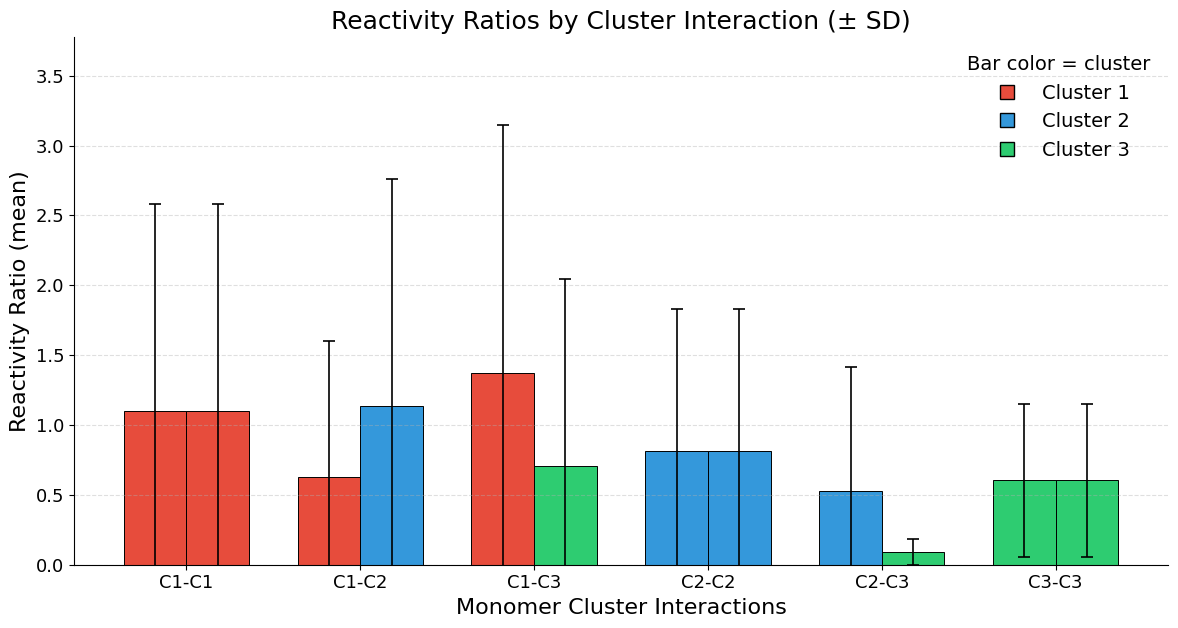

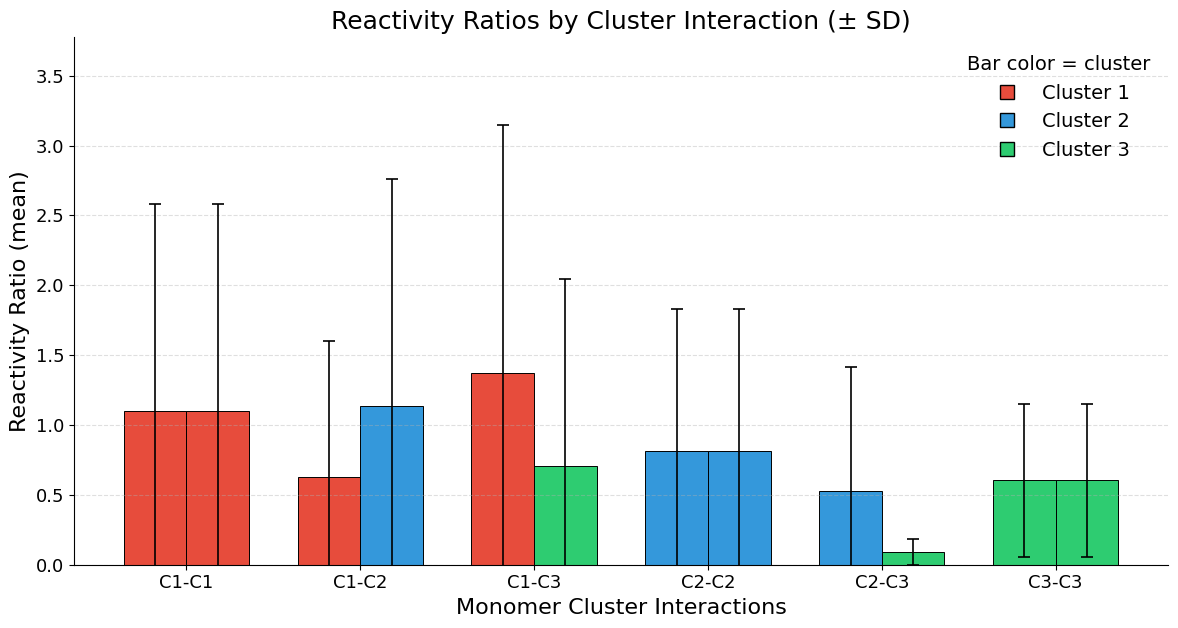


Analysis complete!
Data includes 2304 total entries across 6 interaction types

SUMMARY DATA FOR REFERENCE:
Data structure for plotting:
data = {
    "1-1": {"means": [1.097, 1.097], "vars": [2.197, 2.197], "ns": [1740, 1740]},
    "1-2": {"means": [0.631, 1.134], "vars": [0.937, 2.636], "ns": [858, 858]},
    "1-3": {"means": [1.375, 0.707], "vars": [3.135, 1.796], "ns": [154, 154]},
    "2-2": {"means": [0.817, 0.817], "vars": [1.028, 1.028], "ns": [720, 720]},
    "2-3": {"means": [0.526, 0.092], "vars": [0.787, 0.009], "ns": [52, 52]},
    "3-3": {"means": [0.603, 0.603], "vars": [0.298, 0.298], "ns": [20, 20]},
}


In [29]:
'''
Combined Cluster Interaction Analysis for Reactivity Ratios
============================================================

This code performs a comprehensive analysis of reactivity ratios for different cluster interactions:
1. Loads data and groups by cluster interactions
2. Calculates statistical metrics (mean, variance, count) for each interaction type
3. Generates publication-ready visualization showing average reactivity ratios
4. Provides detailed statistical output and analysis

The code examines both cross-cluster interactions (1-2, 1-3, 2-3) and 
self-interactions (1-1, 2-2, 3-3), calculating mean, variance, and sample size 
for each interaction type.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION PARAMETERS
# =============================================================================

# Data file path
DATA_FILE_PATH = r'/work/bavarian/hsafari2/Manuscript Code/AddedFeaturesWithClusters.xlsx'

# Visualization parameters
ERROR_MODE = "sd"  # Options: "sd" (±SD), "se" (±SE), or "ci95" (±95% CI)
FIGURE_SIZE = (12, 6.5)
DPI = 300

# Color scheme for clusters (matching the clustering figure)
CLUSTER_COLORS = {
    "C1": "#E74C3C",  # Purple (Cluster 1)
    "C2": "#3498DB",  # Red/Coral (Cluster 2)
    "C3": "#2ECC71"   # Teal/Green (Cluster 3)
}

# Font settings
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
})

# =============================================================================
# DATA ANALYSIS FUNCTIONS
# =============================================================================

def load_and_group_data(file_path):
    """
    Load data and group by cluster interactions
    """
    print("Loading data and creating interaction groups...")
    df = pd.read_excel(file_path)
    
    # Create interaction groups dictionary
    interaction_groups = {}
    
    # Group data by cluster interactions
    for idx, row in df.iterrows():
        c1 = row['Cluster_A']
        c2 = row['Cluster_B']
        
        # Ensure clusters are sorted for consistent keys (e.g., both 1-2 and 2-1 become "1-2")
        if c1 == c2:
            key = f"{c1}-{c1}"
        else:
            key = f"{min(c1, c2)}-{max(c1, c2)}"
        
        # Initialize group if it doesn't exist
        if key not in interaction_groups:
            interaction_groups[key] = pd.DataFrame(columns=df.columns)
        
        # Add row to the appropriate group
        interaction_groups[key] = pd.concat([interaction_groups[key], pd.DataFrame([row])], ignore_index=True)
    
    return df, interaction_groups

def analyze_cluster_reactivity(interaction_data, target_cluster):
    """
    Analyze reactivity ratios for a specific cluster in an interaction
    """
    # Get reactivity ratios when cluster is monomer A (r1) and monomer B (r2)
    cluster_values = []
    cluster_values.extend(interaction_data[interaction_data['Cluster_A'] == target_cluster]['r1'])
    cluster_values.extend(interaction_data[interaction_data['Cluster_B'] == target_cluster]['r2'])
    
    if len(cluster_values) > 0:
        mean = np.mean(cluster_values)
        variance = np.var(cluster_values)
        count = len(cluster_values)
        return mean, variance, count, cluster_values
    return 0, 0, 0, []

def analyze_all_interactions(interaction_groups):
    """
    Analyze all cluster interactions and return structured data
    """
    print("\nAnalyzing cluster interactions...")
    results = {}
    
    # Define all possible interactions
    all_interactions = ['1-1', '1-2', '1-3', '2-2', '2-3', '3-3']
    
    for interaction in all_interactions:
        if interaction not in interaction_groups:
            print(f"Interaction {interaction}: No data available")
            results[interaction] = {
                "means": [0, 0], 
                "vars": [0, 0], 
                "ns": [0, 0],
                "stds": [0, 0]
            }
            continue
            
        interaction_data = interaction_groups[interaction]
        
        if '-' in interaction:
            cluster1, cluster2 = map(int, interaction.split('-'))
            
            if cluster1 == cluster2:
                # Self-interaction: combine all r1 and r2 values
                all_values = list(interaction_data['r1']) + list(interaction_data['r2'])
                if len(all_values) > 0:
                    mean = np.mean(all_values)
                    variance = np.var(all_values)
                    std = np.std(all_values)
                    count = len(all_values)
                    results[interaction] = {
                        "means": [mean, mean], 
                        "vars": [variance, variance], 
                        "ns": [count, count],
                        "stds": [std, std]
                    }
                    print(f"Interaction {interaction} (self): mean={mean:.3f}, var={variance:.3f}, n={count}")
                else:
                    results[interaction] = {"means": [0, 0], "vars": [0, 0], "ns": [0, 0], "stds": [0, 0]}
            else:
                # Cross-interaction: analyze each cluster separately
                mean1, var1, count1, values1 = analyze_cluster_reactivity(interaction_data, cluster1)
                mean2, var2, count2, values2 = analyze_cluster_reactivity(interaction_data, cluster2)
                
                std1 = np.std(values1) if len(values1) > 0 else 0
                std2 = np.std(values2) if len(values2) > 0 else 0
                
                results[interaction] = {
                    "means": [mean1, mean2], 
                    "vars": [var1, var2], 
                    "ns": [count1, count2],
                    "stds": [std1, std2]
                }
                print(f"Interaction {interaction}: C{cluster1} mean={mean1:.3f}, C{cluster2} mean={mean2:.3f}")
    
    return results

def pair_clusters(tag):
    """Helper function to get cluster pair from interaction tag"""
    a, b = tag.split("-")
    return f"C{a}", f"C{b}"

# =============================================================================
# VISUALIZATION FUNCTIONS
# =============================================================================

def create_interaction_plot(data, error_mode=ERROR_MODE, save_path=None):
    """
    Create publication-ready plot of cluster interactions
    """
    interactions = ["1-1", "1-2", "1-3", "2-2", "2-3", "3-3"]
    x = np.arange(len(interactions))
    width = 0.36
    
    # Build series for plotting
    bar1_vals, bar2_vals, err1_vals, err2_vals, c1_tags, c2_tags = [], [], [], [], [], []
    
    for tag in interactions:
        Cleft, Cright = pair_clusters(tag)
        means = data[tag]["means"]
        vars_ = data[tag]["vars"]
        stds = data[tag]["stds"]
        ns = data[tag]["ns"]

        # Calculate error bars based on mode
        if error_mode == "sd":
            err = stds
        elif error_mode == "se":
            err = [std/np.sqrt(n) if n > 0 else 0 for std, n in zip(stds, ns)]
        elif error_mode == "ci95":
            err = [1.96 * std/np.sqrt(n) if n > 0 else 0 for std, n in zip(stds, ns)]
        else:
            raise ValueError("error_mode must be one of: 'sd', 'se', 'ci95'")

        bar1_vals.append(means[0]); bar2_vals.append(means[1])
        err1_vals.append(err[0]);   err2_vals.append(err[1])
        c1_tags.append(Cleft);      c2_tags.append(Cright)

    # Create plot
    fig, ax = plt.subplots(figsize=FIGURE_SIZE)

    # Create bars
    bars1 = ax.bar(
        x - width/2, bar1_vals, width,
        color=[CLUSTER_COLORS[c] for c in c1_tags],
        edgecolor="black", linewidth=0.7,
        label="First cluster"
    )
    bars2 = ax.bar(
        x + width/2, bar2_vals, width,
        color=[CLUSTER_COLORS[c] for c in c2_tags],
        edgecolor="black", linewidth=0.7,
        label="Second cluster"
    )

    # Add error bars
    ax.errorbar(x - width/2, bar1_vals, yerr=err1_vals, fmt="none",
                ecolor="black", elinewidth=1.2, capsize=4, capthick=1.2)
    ax.errorbar(x + width/2, bar2_vals, yerr=err2_vals, fmt="none",
                ecolor="black", elinewidth=1.2, capsize=4, capthick=1.2)

    # Customize plot
    ax.set_ylabel("Reactivity Ratio (mean)")
    ax.set_xlabel("Monomer Cluster Interactions")
    title_suffix = {"sd":"± SD", "se":"± SE", "ci95":"± 95% CI"}[error_mode]
    ax.set_title(f"Reactivity Ratios by Cluster Interaction ({title_suffix})")
    ax.set_xticks(x)
    ax.set_xticklabels([f"C{i[0]}-C{i[2]}" for i in interactions])

    # Styling
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    # Dynamic y-limit
    m = np.maximum(np.asarray(bar1_vals, dtype=float), np.asarray(bar2_vals, dtype=float))
    e = np.maximum(np.asarray(err1_vals, dtype=float), np.asarray(err2_vals, dtype=float))
    ymax = float(np.max(m + e))
    ax.set_ylim(0, ymax * 1.20)

    # Legend
    legend_handles = [
        plt.Line2D([0],[0], marker="s", color="w",
                   markerfacecolor=CLUSTER_COLORS["C1"], markeredgecolor="black",
                   markersize=10, label="Cluster 1"),
        plt.Line2D([0],[0], marker="s", color="w",
                   markerfacecolor=CLUSTER_COLORS["C2"], markeredgecolor="black",
                   markersize=10, label="Cluster 2"),
        plt.Line2D([0],[0], marker="s", color="w",
                   markerfacecolor=CLUSTER_COLORS["C3"], markeredgecolor="black",
                   markersize=10, label="Cluster 3"),
    ]
    ax.legend(handles=legend_handles, frameon=False, loc="upper right", 
              title="Bar color = cluster")

    plt.tight_layout()
    '''
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=DPI, bbox_inches="tight", facecolor='white')
        print(f"Figure saved to: {save_path}")
    '''
    plt.show()
    return fig, ax

def print_detailed_analysis(interaction_groups, results):
    """
    Print detailed statistical analysis
    """
    print("\n" + "="*80)
    print("DETAILED CLUSTER INTERACTION ANALYSIS")
    print("="*80)
    
    print("\nInteraction Groups Created:")
    for key, group in interaction_groups.items():
        print(f"Group {key}: {len(group)} entries")

    print("\nAnalysis of Different Cluster Interactions:")
    print("-" * 50)
    different_pairs = [('1-2', 1, 2), ('1-3', 1, 3), ('2-3', 2, 3)]
    for pair_key, cluster1, cluster2 in different_pairs:
        if pair_key not in interaction_groups or len(interaction_groups[pair_key]) == 0:
            print(f"\nInteraction between Cluster {cluster1} and Cluster {cluster2}: No data available")
            continue
            
        print(f"\nInteraction between Cluster {cluster1} and Cluster {cluster2}:")
        means = results[pair_key]["means"]
        vars_ = results[pair_key]["vars"]
        ns = results[pair_key]["ns"]
        stds = results[pair_key]["stds"]
        
        print(f"Cluster {cluster1} reactivity ratios:")
        print(f"  Mean = {means[0]:.3f}")
        print(f"  Variance = {vars_[0]:.3f}")
        print(f"  Std Dev = {stds[0]:.3f}")
        print(f"  Number of values = {ns[0]}")
        
        print(f"Cluster {cluster2} reactivity ratios:")
        print(f"  Mean = {means[1]:.3f}")
        print(f"  Variance = {vars_[1]:.3f}")
        print(f"  Std Dev = {stds[1]:.3f}")
        print(f"  Number of values = {ns[1]}")

    print("\nAnalysis of Same Cluster Interactions:")
    print("-" * 50)
    same_pairs = [('1-1', 1), ('2-2', 2), ('3-3', 3)]
    for pair_key, cluster in same_pairs:
        if pair_key not in interaction_groups or len(interaction_groups[pair_key]) == 0:
            print(f"\nCluster {cluster} self-interaction: No data available")
            continue
            
        print(f"\nCluster {cluster} self-interaction:")
        means = results[pair_key]["means"]
        vars_ = results[pair_key]["vars"]
        ns = results[pair_key]["ns"]
        stds = results[pair_key]["stds"]
        
        print(f"  Mean = {means[0]:.3f}")
        print(f"  Variance = {vars_[0]:.3f}")
        print(f"  Std Dev = {stds[0]:.3f}")
        print(f"  Number of values = {ns[0]}")

# =============================================================================
# MAIN EXECUTION
# =============================================================================

def main():
    """
    Main function to run the complete analysis
    """
    print("Starting Cluster Interaction Analysis...")
    print("="*60)
    
    # Load and analyze data
    df, interaction_groups = load_and_group_data(DATA_FILE_PATH)
    results = analyze_all_interactions(interaction_groups)
    
    # Print detailed analysis
    print_detailed_analysis(interaction_groups, results)
    
    # Create visualization
    print(f"\nCreating visualization with error bars: {ERROR_MODE}")
    
    # Create plot WITHOUT saving (default)
    fig, ax = create_interaction_plot(results, error_mode=ERROR_MODE)
    
    # UNCOMMENT TO SAVE THE FIGURE:
    fig, ax = create_interaction_plot(results, error_mode=ERROR_MODE, 
                                       save_path="Figure6_cluster_interactions.png")
    
    print(f"\nAnalysis complete!")
    print(f"Data includes {len(df)} total entries across {len(interaction_groups)} interaction types")
    
    return df, interaction_groups, results, fig, ax

if __name__ == "__main__":
    df, interaction_groups, results, fig, ax = main()
    
    # Print summary of results for easy copying to other code/papers
    print("\n" + "="*60)
    print("SUMMARY DATA FOR REFERENCE:")
    print("="*60)
    print("Data structure for plotting:")
    print("data = {")
    for interaction, values in results.items():
        means = values["means"]
        vars_ = values["vars"]
        ns = values["ns"]
        print(f'    "{interaction}": {{"means": [{means[0]:.3f}, {means[1]:.3f}], "vars": [{vars_[0]:.3f}, {vars_[1]:.3f}], "ns": [{ns[0]}, {ns[1]}]}},')
    print("}")

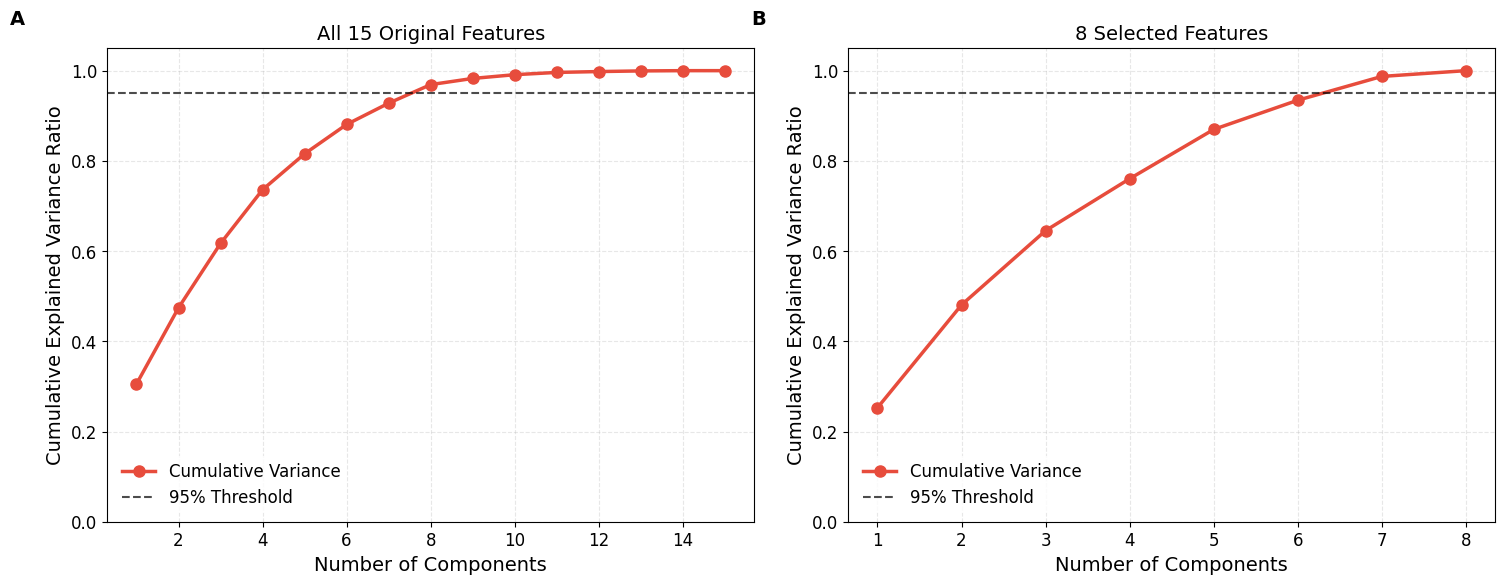


Components needed for 95% variance:
Original features (15): 8 components
Selected features (8): 7 components

Detailed variance analysis:

Original 15 features:
Component 1: 0.305 (0.305 cumulative)
Component 2: 0.169 (0.474 cumulative)
Component 3: 0.143 (0.617 cumulative)
Component 4: 0.119 (0.736 cumulative)
Component 5: 0.080 (0.816 cumulative)
Component 6: 0.065 (0.881 cumulative)
Component 7: 0.047 (0.928 cumulative)
Component 8: 0.041 (0.969 cumulative)
Component 9: 0.014 (0.983 cumulative)
Component 10: 0.008 (0.991 cumulative)
Component 11: 0.005 (0.996 cumulative)
Component 12: 0.002 (0.998 cumulative)
Component 13: 0.001 (0.999 cumulative)
Component 14: 0.001 (1.000 cumulative)
Component 15: 0.000 (1.000 cumulative)

Selected 8 features:
Component 1: 0.253 (0.253 cumulative)
Component 2: 0.228 (0.481 cumulative)
Component 3: 0.165 (0.645 cumulative)
Component 4: 0.115 (0.760 cumulative)
Component 5: 0.109 (0.870 cumulative)
Component 6: 0.065 (0.934 cumulative)
Component 7:

In [16]:
'''
Feature Selection Validation with PCA
This code validates our feature selection strategy using Principal Component Analysis (PCA), 
generating Figure S1 in the Supporting Information. It compares the cumulative explained variance 
between the original 15 molecular descriptors and our 8 selected features. The analysis demonstrates 
that 8 principal components capture 90% of variance in the original dataset (indicating redundancy), 
while 6 components achieve the same threshold with our selected features, confirming these 
descriptors efficiently represent distinct molecular properties relevant to polymerization behavior.
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Set publication-quality plotting parameters
plt.rcParams.update({
    'font.family': '',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Load data

'Here, please use the  Monomer Physicochemical Features excel file that is shared with you.'

file_path = r'/work/bavarian/hsafari2/Manuscript Code/UniqueMonomersProperties.xlsx'
df = pd.read_excel(file_path)

# Define both feature sets
original_features = ['MW', 'vinylIsInLoop', 'VinylCarbonsCharge', 'MV', 'TPSA', 
                    'NumHAcceptors', 'NumHDonors', 'MolLogP', 'Hybridization_sp', 
                    'Hybridization_sp2', 'Hybridization_sp3', 'Chirality', 
                    'NumConnectedHydrogens', 'ConjugatedBonds', 'Stereochemistry']
selected_features = ['MW', 'vinylIsInLoop', 'VinylCarbonsCharge', 'TPSA', 
                    'NumHDonors', 'MolLogP', 'Hybridization_sp2', 'Stereochemistry']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3)  # Add space between subplots

# Function to perform PCA and plot results
def plot_pca_analysis(features, ax, title):
    # Prepare data and perform PCA
    features_df = df[features]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_df)
    pca = PCA()
    pca_results = pca.fit_transform(scaled_features)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Plot cumulative variance
    ax.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
            'o-', color='#E74C3C', linewidth=2.5, markersize=8,
            label='Cumulative Variance')
    
    # Add threshold line
    ax.axhline(y=0.95, color='black', linestyle='--', 
               label='95% Threshold', alpha=0.7, linewidth=1.5)
    
    # Customize plot
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Cumulative Explained Variance Ratio')
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(frameon=True, facecolor='white', edgecolor='none')
    ax.set_ylim(0, 1.05)
    
    return pca.explained_variance_ratio_

# Create both plots
variance_original = plot_pca_analysis(original_features, ax1, 'All 15 Original Features')
variance_selected = plot_pca_analysis(selected_features, ax2, '8 Selected Features')

# Add subplot labels
ax1.text(-0.15, 1.05, 'A', transform=ax1.transAxes, size=14, weight='bold')
ax2.text(-0.15, 1.05, 'B', transform=ax2.transAxes, size=14, weight='bold')

# Adjust layout and save
plt.tight_layout()
plt.savefig('PCA_analysis_comparison.png', dpi=300, bbox_inches='tight')
#plt.savefig('PCA_analysis_comparison.pdf', bbox_inches='tight')
plt.show()

# Print analysis results for both feature sets
print("\nComponents needed for 95% variance:")
print("Original features (15):", np.argmax(np.cumsum(variance_original) >= 0.95) + 1, "components")
print("Selected features (8):", np.argmax(np.cumsum(variance_selected) >= 0.95) + 1, "components")

# Print detailed variance analysis for both sets
print("\nDetailed variance analysis:")
print("\nOriginal 15 features:")
cumsum_orig = np.cumsum(variance_original)
for i, (var, cum) in enumerate(zip(variance_original, cumsum_orig), 1):
    print(f"Component {i}: {var:.3f} ({cum:.3f} cumulative)")

print("\nSelected 8 features:")
cumsum_sel = np.cumsum(variance_selected)
for i, (var, cum) in enumerate(zip(variance_selected, cumsum_sel), 1):
    print(f"Component {i}: {var:.3f} ({cum:.3f} cumulative)")

Creating dimensionality reduction visualization with IDENTICAL clustering to main code...
DIMENSIONALITY REDUCTION WITH IDENTICAL CLUSTERING
Using IDENTICAL methodology to main clustering code for consistency...
Applying MinMaxScaler (IDENTICAL to main code) to 8 features...
Using characteristic-based cluster assignment (IDENTICAL to main code)...

Current cluster characteristics:
  Cluster 1: vinylIsInLoop=0.000, MW=0.238, MolLogP=0.537
  Cluster 2: vinylIsInLoop=1.000, MW=0.205, MolLogP=0.415
  Cluster 3: vinylIsInLoop=0.000, MW=0.179, MolLogP=0.430

Cluster reassignment applied:
  Old 2 -> New 3 (Green, highest vinylIsInLoop)
  Old 1 -> New 2 (Blue, highest MolLogP)
  Old 3 -> New 1 (Red, remaining)
Applying dimensionality reduction techniques...
  Computing PCA embeddings...
    PCA explained variance: 0.676
  Computing t-SNE embeddings...
  Computing UMAP embeddings...
  Dimensionality reduction complete.
Creating comprehensive visualization with IDENTICAL cluster assignments...
V

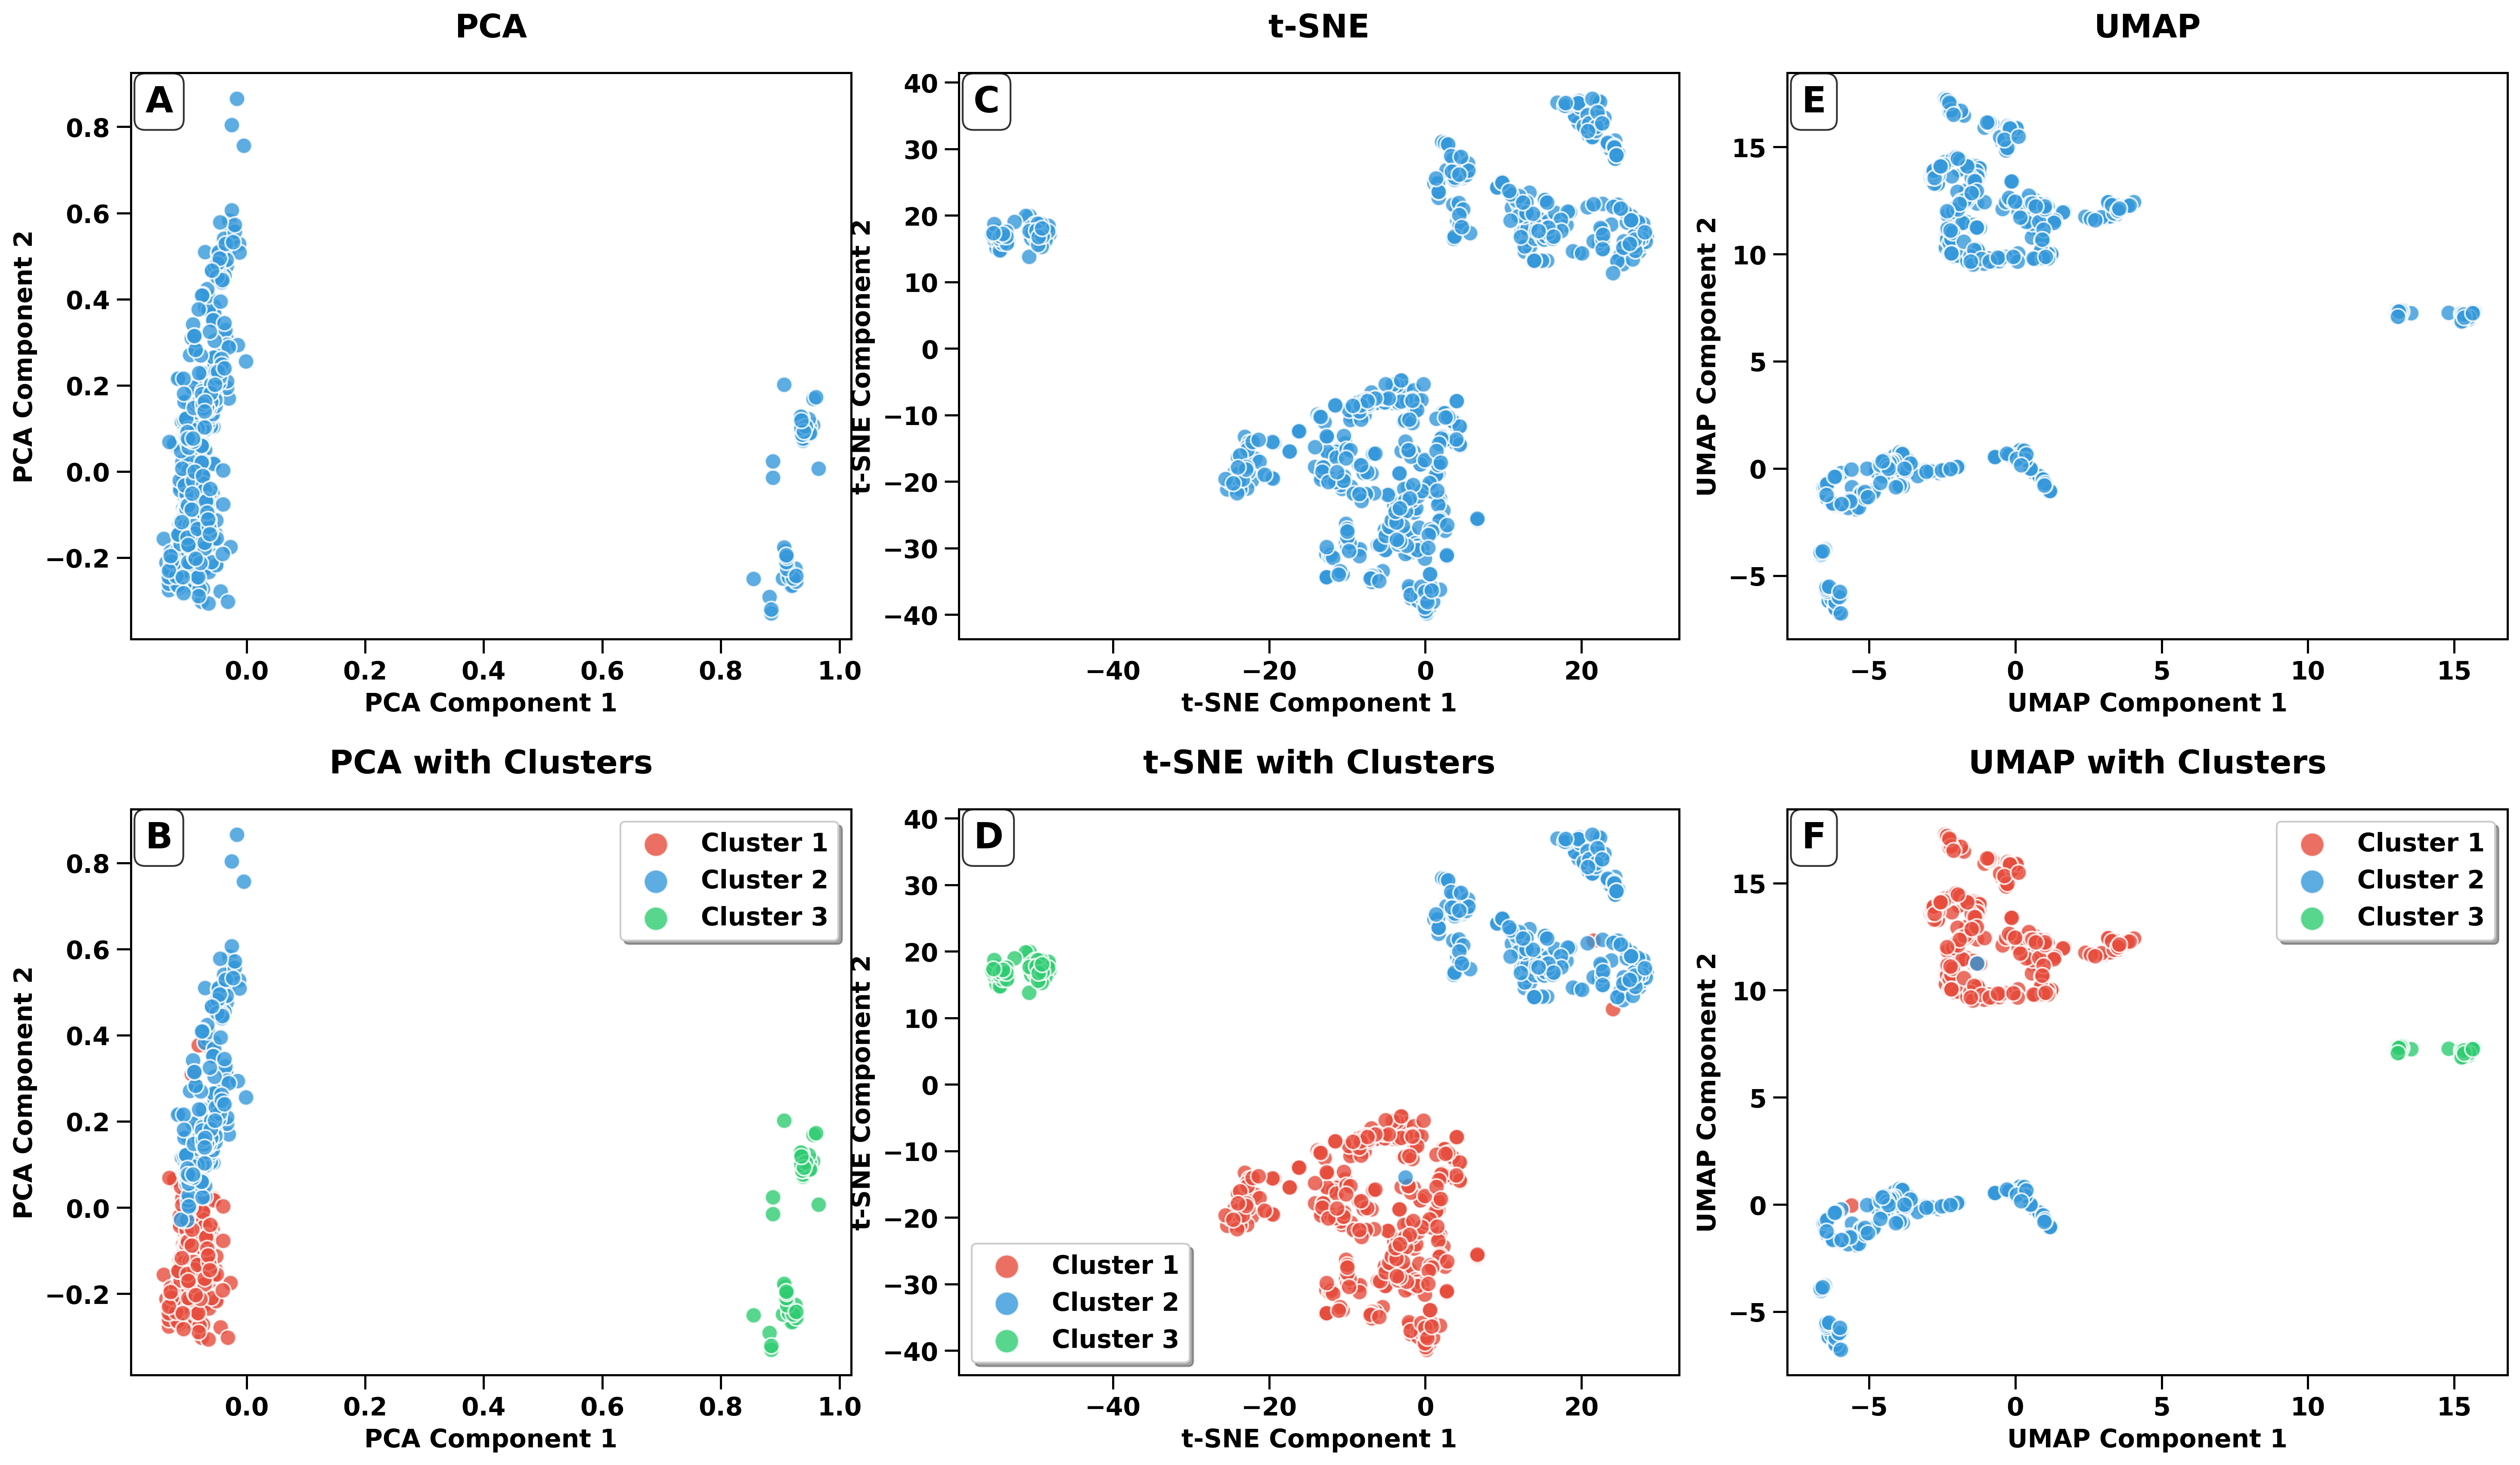


SUCCESS: Dimensionality reduction visualization created with IDENTICAL clustering!
  - Same MinMaxScaler preprocessing
  - Same spectral clustering parameters
  - Same characteristic-based assignment
  - Same color scheme and styling
  - Cluster sizes should now be IDENTICAL to main code


In [5]:
'''
Professional Dimensionality Reduction and Clustering Visualization
This code creates the comprehensive visualization for Figure S3 of the Supporting Information, 
comparing three complementary dimensionality reduction techniques (PCA, t-SNE, and UMAP) for 
monomer datasets. The code is fully consistent with the main clustering analysis, using identical
preprocessing, scaling, and cluster assignment methods to ensure reproducible results.

IMPORTANT: This code uses the exact same methodology as the main clustering analysis to ensure
consistent cluster assignments across all visualizations.
'''

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # CRITICAL: Same as main code
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import umap
import pickle
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# Suppress convergence warnings for cleaner output
warnings.simplefilter('ignore', category=UserWarning)

# =============================================================================
# CUSTOMIZATION PARAMETERS - Matched to main clustering code standards
# =============================================================================

# FONT SIZES - Controls text size throughout the figure
TITLE_FONT_SIZE = 18          
AXIS_LABEL_FONT_SIZE = 14     
TICK_LABEL_FONT_SIZE = 14     
LEGEND_FONT_SIZE = 14         
PANEL_LABEL_FONT_SIZE = 20    

# FONT STYLES - Controls whether text appears bold or normal
TITLE_FONT_WEIGHT = 'bold'    
AXIS_LABEL_FONT_WEIGHT = 'bold'  
TICK_LABEL_FONT_WEIGHT = 'bold'  
LEGEND_FONT_WEIGHT = 'bold'      
RADAR_LABEL_FONT_WEIGHT = 'bold'   

# COLORS - EXACTLY the same as main clustering code for consistency
CLUSTER_COLORS = ['#E74C3C', '#3498DB', '#2ECC71']  # Red, Blue, Green
SINGLE_COLOR = '#3498DB'      # Color for unclustered data
BACKGROUND_COLOR = 'white'    

# FIGURE DIMENSIONS - Overall size and quality
FIGURE_SIZE = (20, 12)        
DPI = 300                     
SUBPLOT_ROWS = 2
SUBPLOT_COLS = 3

# SUBPLOT SPACING - Control spacing between panels
VERTICAL_SPACING = 0.3        
HORIZONTAL_SPACING = 0.15     
LEFT_MARGIN = 0.06
RIGHT_MARGIN = 0.98
TOP_MARGIN = 0.92
BOTTOM_MARGIN = 0.08

# SCATTER PLOT STYLING - Appearance of points in plots
SCATTER_POINT_SIZE = 80       # Matched to main code
SCATTER_ALPHA = 0.8           # Matched to main code
SCATTER_EDGE_WIDTH = 1.0      # Matched to main code
SCATTER_EDGE_COLOR = 'white'  

# GRID CONTROLS - Show/hide and style grid lines
SHOW_GRID = False             # Matched to main code
GRID_ALPHA = 0.3              
GRID_LINESTYLE = '--'         

# LEGEND POSITIONING - Control legend placement
LEGEND_BBOX_X = 0.95          
LEGEND_BBOX_Y = 0.95          
LEGEND_FRAME_ALPHA = 0.9      

# PANEL LABELS STYLING - Appearance of A, B, C, D, E, F labels
PANEL_LABEL_COLOR = 'black'   
PANEL_LABEL_WEIGHT = 'bold'   
PANEL_LABEL_BBOX = dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8)
PANEL_LABEL_X_OFFSET = -0.1   
PANEL_LABEL_Y_OFFSET = 1.1    

# DIMENSIONALITY REDUCTION PARAMETERS - Matched to main code t-SNE settings
T_SNE_PERPLEXITY = 30         
T_SNE_LEARNING_RATE = 200     
T_SNE_N_ITER = 3000           
T_SNE_MIN_GRAD_NORM = 1e-7
T_SNE_EARLY_EXAGGERATION = 12
UMAP_N_NEIGHBORS = 15         
UMAP_MIN_DIST = 0.1           

# CLUSTERING PARAMETERS - EXACTLY matched to main code
SPECTRAL_N_NEIGHBORS = 10     # Same as main code
SPECTRAL_ASSIGN_LABELS = 'kmeans'  # Same as main code

# RANDOM SEEDS - For reproducible results
RANDOM_SEED = 42              

# =============================================================================
# CLUSTER STABILIZATION FUNCTIONS - IDENTICAL to main code
# =============================================================================

def save_reference_centroids(centroids, filename='dimred_reference_centroids.pkl'):
    """Save reference centroids to file for consistent cluster labeling"""
    with open(filename, 'wb') as f:
        pickle.dump(centroids, f)
    print(f"Reference centroids saved to {filename}")

def load_reference_centroids(filename='dimred_reference_centroids.pkl'):
    """Load reference centroids from file"""
    try:
        with open(filename, 'rb') as f:
            centroids = pickle.load(f)
        print(f"Reference centroids loaded from {filename}")
        return centroids
    except FileNotFoundError:
        print(f"No reference file found. Will create new reference.")
        return None

def stabilize_cluster_labels(scaled_features, cluster_labels, reference_centroids=None):
    """
    Stabilize cluster labels by matching centroids to a reference
    IDENTICAL function to main clustering code for consistency
    """
    n_clusters = len(np.unique(cluster_labels))
    
    # Calculate current centroids
    current_centroids = []
    for i in range(n_clusters):
        mask = cluster_labels == i
        if np.any(mask):  # Make sure cluster is not empty
            centroid = scaled_features[mask].mean(axis=0)
            current_centroids.append(centroid)
    current_centroids = np.array(current_centroids)
    
    # If no reference, use current as reference (first run)
    if reference_centroids is None:
        print("Creating new reference centroids")
        return cluster_labels, current_centroids
    
    # Find best matching between current and reference centroids
    distances = cdist(current_centroids, reference_centroids)
    
    # Use Hungarian algorithm for optimal assignment
    row_indices, col_indices = linear_sum_assignment(distances)
    
    # Create label mapping
    label_mapping = {row_indices[i]: col_indices[i] for i in range(len(row_indices))}
    
    # Apply mapping to cluster labels
    stable_labels = np.array([label_mapping[label] for label in cluster_labels])
    
    print("Cluster labels stabilized using reference centroids")
    return stable_labels, reference_centroids

def force_cluster_assignment_by_characteristics(scaled_df, features):
    """
    IDENTICAL function from main clustering code
    Force cluster assignments based on dominant characteristics to match your figure
    
    Based on your corrections:
    - Cluster 1 (Red): Correct as is
    - Cluster 2 (Blue): High MolLogP 
    - Cluster 3 (Green): High vinylIsInLoop (~1.0)
    """
    cluster_means = scaled_df.groupby('Cluster')[features].mean()
    
    print("\nCurrent cluster characteristics:")
    for cluster in cluster_means.index:
        vinyl_val = cluster_means.loc[cluster, 'vinylIsInLoop']
        mw_val = cluster_means.loc[cluster, 'MW']
        mollogp_val = cluster_means.loc[cluster, 'MolLogP']
        print(f"  Cluster {cluster}: vinylIsInLoop={vinyl_val:.3f}, MW={mw_val:.3f}, MolLogP={mollogp_val:.3f}")
    
    # Find cluster with highest vinylIsInLoop - this should be Cluster 3 (green)
    highest_vinyl_cluster = cluster_means['vinylIsInLoop'].idxmax()
    
    # Find cluster with highest MolLogP among the remaining - this should be Cluster 2 (blue)
    remaining_clusters = [c for c in cluster_means.index if c != highest_vinyl_cluster]
    remaining_means = cluster_means.loc[remaining_clusters]
    highest_mollogp_cluster = remaining_means['MolLogP'].idxmax()
    
    # The remaining cluster should be Cluster 1 (red)
    remaining_cluster = [c for c in cluster_means.index if c not in [highest_vinyl_cluster, highest_mollogp_cluster]][0]
    
    # Create mapping: current_cluster -> desired_cluster
    cluster_mapping = {
        highest_vinyl_cluster: 3,      # Green - highest vinylIsInLoop
        highest_mollogp_cluster: 2,    # Blue - highest MolLogP among remaining  
        remaining_cluster: 1           # Red - remaining
    }
    
    # Apply the mapping
    scaled_df['Cluster'] = scaled_df['Cluster'].map(cluster_mapping)
    
    print(f"\nCluster reassignment applied:")
    print(f"  Old {highest_vinyl_cluster} -> New 3 (Green, highest vinylIsInLoop)")
    print(f"  Old {highest_mollogp_cluster} -> New 2 (Blue, highest MolLogP)")  
    print(f"  Old {remaining_cluster} -> New 1 (Red, remaining)")
    
    return scaled_df

# =============================================================================
# DIMENSIONALITY REDUCTION FUNCTIONS
# =============================================================================

def apply_dimensionality_reduction(scaled_features):
    """
    Apply three complementary dimensionality reduction techniques with parameters
    optimized for the monomer clustering visualization
    """
    print("Applying dimensionality reduction techniques...")
    
    # Principal Component Analysis - optimized for chemical data visualization
    print("  Computing PCA embeddings...")
    pca = PCA(n_components=2, random_state=RANDOM_SEED)
    pca_2d = pca.fit_transform(scaled_features)
    print(f"    PCA explained variance: {pca.explained_variance_ratio_.sum():.3f}")
    
    # t-SNE with IDENTICAL parameters to main code
    print("  Computing t-SNE embeddings...")
    tsne = TSNE(
        n_components=2,
        perplexity=T_SNE_PERPLEXITY,
        early_exaggeration=T_SNE_EARLY_EXAGGERATION,
        learning_rate=T_SNE_LEARNING_RATE,
        n_iter=T_SNE_N_ITER,
        min_grad_norm=T_SNE_MIN_GRAD_NORM,
        random_state=RANDOM_SEED,
        metric='euclidean'
    )
    tsne_2d = tsne.fit_transform(scaled_features)
    
    # UMAP for global structure preservation
    print("  Computing UMAP embeddings...")
    umap_reducer = umap.UMAP(
        n_neighbors=UMAP_N_NEIGHBORS, 
        min_dist=UMAP_MIN_DIST, 
        random_state=RANDOM_SEED
    )
    umap_2d = umap_reducer.fit_transform(scaled_features)
    
    print("  Dimensionality reduction complete.")
    
    return {
        'PCA': pca_2d,
        't-SNE': tsne_2d,
        'UMAP': umap_2d
    }

def perform_identical_clustering(scaled_features, n_clusters=3):
    """
    Perform IDENTICAL spectral clustering as main code to ensure consistent results
    Uses exact same parameters and methodology as the main clustering analysis
    """
    print(f"Performing spectral clustering with {n_clusters} clusters...")
    print("  Using IDENTICAL parameters to main clustering code...")
    
    # IDENTICAL spectral clustering setup to main code
    spectral = SpectralClustering(
        n_clusters=n_clusters,
        random_state=RANDOM_SEED,
        affinity='nearest_neighbors',
        n_neighbors=SPECTRAL_N_NEIGHBORS,  # Same as main code
        assign_labels=SPECTRAL_ASSIGN_LABELS  # Same as main code
    )
    
    # Fit clustering and get initial labels
    initial_cluster_labels = spectral.fit_predict(scaled_features)
    
    print(f"  Spectral clustering complete. Found {len(np.unique(initial_cluster_labels))} clusters.")
    
    return initial_cluster_labels

# =============================================================================
# VISUALIZATION FUNCTIONS - Professional quality matching main code
# =============================================================================

def setup_publication_style():
    """Configure matplotlib for publication-quality figures matching main code style"""
    plt.style.use('default')  # Ensure clean styling like main code
    plt.rcParams.update({
        'font.size': AXIS_LABEL_FONT_SIZE,
        'axes.labelsize': AXIS_LABEL_FONT_SIZE,
        'axes.titlesize': TITLE_FONT_SIZE,
        'legend.fontsize': LEGEND_FONT_SIZE,
        'xtick.labelsize': TICK_LABEL_FONT_SIZE,
        'ytick.labelsize': TICK_LABEL_FONT_SIZE,
        'axes.grid': SHOW_GRID,
        'grid.alpha': GRID_ALPHA,
        'grid.linestyle': GRID_LINESTYLE,
        'figure.figsize': FIGURE_SIZE,
        'axes.axisbelow': True,
        'xtick.major.width': 1.2,
        'ytick.major.width': 1.2,
        'xtick.major.size': 8,
        'ytick.major.size': 8,
        'axes.linewidth': 1.2,
        'figure.facecolor': BACKGROUND_COLOR
    })

def plot_unclustered_data(ax, data, title, method_name):
    """Plot unclustered data points with styling consistent with main code"""
    scatter = ax.scatter(
        data[:, 0], data[:, 1],
        c=SINGLE_COLOR,
        alpha=SCATTER_ALPHA,
        s=SCATTER_POINT_SIZE,
        edgecolors=SCATTER_EDGE_COLOR,
        linewidth=SCATTER_EDGE_WIDTH
    )
    
    ax.set_title(title, fontsize=TITLE_FONT_SIZE, fontweight=TITLE_FONT_WEIGHT, pad=20)
    ax.set_xlabel(f'{method_name} Component 1', fontsize=AXIS_LABEL_FONT_SIZE, 
                  fontweight=AXIS_LABEL_FONT_WEIGHT)
    ax.set_ylabel(f'{method_name} Component 2', fontsize=AXIS_LABEL_FONT_SIZE, 
                  fontweight=AXIS_LABEL_FONT_WEIGHT)
    
    # Apply grid settings exactly like main code
    if SHOW_GRID:
        ax.grid(True, linestyle=GRID_LINESTYLE, alpha=GRID_ALPHA)
    
    # Style the axes like main code
    ax.tick_params(labelsize=TICK_LABEL_FONT_SIZE)
    for label in ax.get_xticklabels():
        label.set_fontweight(TICK_LABEL_FONT_WEIGHT)
    for label in ax.get_yticklabels():
        label.set_fontweight(TICK_LABEL_FONT_WEIGHT)

def plot_clustered_data(ax, data, cluster_labels, title, method_name):
    """Plot clustered data with IDENTICAL styling to main code"""
    # Plot each cluster separately using the SAME color scheme as main code
    for cluster in range(1, 4):  # Clusters are 1-indexed in our system
        cluster_data_indices = cluster_labels == cluster
        if np.any(cluster_data_indices):  # Only plot if cluster has points
            ax.scatter(
                data[cluster_data_indices, 0], 
                data[cluster_data_indices, 1],
                c=CLUSTER_COLORS[cluster-1],  # Same color mapping as main code
                label=f'Cluster {cluster}',
                alpha=SCATTER_ALPHA,
                s=SCATTER_POINT_SIZE,
                edgecolors=SCATTER_EDGE_COLOR,
                linewidth=SCATTER_EDGE_WIDTH
            )
    
    ax.set_title(title, fontsize=TITLE_FONT_SIZE, fontweight=TITLE_FONT_WEIGHT, pad=20)
    ax.set_xlabel(f'{method_name} Component 1', fontsize=AXIS_LABEL_FONT_SIZE, 
                  fontweight=AXIS_LABEL_FONT_WEIGHT)
    ax.set_ylabel(f'{method_name} Component 2', fontsize=AXIS_LABEL_FONT_SIZE, 
                  fontweight=AXIS_LABEL_FONT_WEIGHT)
    
    # Create legend with IDENTICAL styling to main code
    legend = ax.legend(fontsize=LEGEND_FONT_SIZE, markerscale=1.5, frameon=True, 
                      fancybox=True, shadow=True)
    for text in legend.get_texts():
        text.set_fontweight(LEGEND_FONT_WEIGHT)
    
    # Apply grid settings exactly like main code
    if SHOW_GRID:
        ax.grid(True, linestyle=GRID_LINESTYLE, alpha=GRID_ALPHA)
    
    # Apply IDENTICAL tick styling to main code
    ax.tick_params(labelsize=TICK_LABEL_FONT_SIZE)
    for label in ax.get_xticklabels():
        label.set_fontweight(TICK_LABEL_FONT_WEIGHT)
    for label in ax.get_yticklabels():
        label.set_fontweight(TICK_LABEL_FONT_WEIGHT)

def add_panel_labels(fig):
    """Add panel labels (A, B, C, D, E, F) with IDENTICAL styling to main code"""
    panel_labels = ['A', 'B', 'C', 'D', 'E', 'F']
    
    for i, ax in enumerate(fig.axes):
        ax.text(
            0.02, 0.98, panel_labels[i], 
            transform=ax.transAxes,
            fontsize=PANEL_LABEL_FONT_SIZE, 
            fontweight=PANEL_LABEL_WEIGHT,
            color=PANEL_LABEL_COLOR,
            va='top', ha='left',
            bbox=PANEL_LABEL_BBOX
        )

# =============================================================================
# MAIN VISUALIZATION FUNCTION - Ensures IDENTICAL clustering to main code
# =============================================================================

def plot_clustering_analysis_with_dimred(df, features, n_clusters=3, 
                                       reference_file='dimred_reference_centroids.pkl', 
                                       force_characteristics=True):
    """
    Create dimensionality reduction visualization with IDENTICAL clustering methodology
    as the main clustering analysis code. This ensures consistent cluster assignments.
    
    This function replicates the exact clustering approach from the main code, then
    applies the results to visualize PCA, t-SNE, and UMAP representations.
    
    Parameters:
    df: pandas DataFrame containing the data
    features: list of feature names to use for clustering
    n_clusters: number of clusters to create
    reference_file: filename to store/load reference centroids for label stability
    force_characteristics: if True, force cluster assignment based on characteristics
    
    Returns:
    fig: matplotlib figure object
    scaled_df: DataFrame with scaling and cluster assignments
    """
    
    print("=" * 70)
    print("DIMENSIONALITY REDUCTION WITH IDENTICAL CLUSTERING")
    print("=" * 70)
    print("Using IDENTICAL methodology to main clustering code for consistency...")
    
    # Setup publication-quality plotting style
    setup_publication_style()
    
    # CRITICAL: Use IDENTICAL scaling as main code (MinMaxScaler, not StandardScaler)
    print(f"Applying MinMaxScaler (IDENTICAL to main code) to {len(features)} features...")
    scaler = MinMaxScaler(feature_range=(0, 1))  # SAME as main code
    scaled_features = scaler.fit_transform(df[features])
    
    # Create DataFrame with scaled features - IDENTICAL approach to main code
    scaled_df = pd.DataFrame(scaled_features, columns=features)

    # Perform spectral clustering with IDENTICAL parameters to main code
    spectral = SpectralClustering(
        n_clusters=n_clusters, 
        random_state=RANDOM_SEED, 
        affinity='nearest_neighbors',
        n_neighbors=SPECTRAL_N_NEIGHBORS,  # Same as main code
        assign_labels=SPECTRAL_ASSIGN_LABELS  # Same as main code
    )
    initial_labels = spectral.fit_predict(scaled_features)
    
    # Apply IDENTICAL cluster assignment logic as main code
    if force_characteristics:
        # Use IDENTICAL characteristic-based assignment as main code
        print("Using characteristic-based cluster assignment (IDENTICAL to main code)...")
        scaled_df['Cluster'] = initial_labels + 1
        scaled_df = force_cluster_assignment_by_characteristics(scaled_df, features)
    else:
        # Use IDENTICAL centroid-based stabilization as main code
        print("Using centroid-based cluster stabilization (IDENTICAL to main code)...")
        reference_centroids = load_reference_centroids(reference_file)
        stable_labels, current_centroids = stabilize_cluster_labels(
            scaled_features, initial_labels, reference_centroids
        )
        if reference_centroids is None:
            save_reference_centroids(current_centroids, reference_file)
        scaled_df['Cluster'] = stable_labels + 1

    # Apply dimensionality reduction techniques to the scaled features
    embeddings = apply_dimensionality_reduction(scaled_features)
    
    # Create the comprehensive visualization
    print("Creating comprehensive visualization with IDENTICAL cluster assignments...")
    fig = plt.figure(figsize=FIGURE_SIZE, dpi=DPI)
    fig.patch.set_facecolor(BACKGROUND_COLOR)
    
    # Adjust spacing between subplots exactly like main code
    plt.subplots_adjust(
        left=LEFT_MARGIN, 
        bottom=BOTTOM_MARGIN, 
        right=RIGHT_MARGIN, 
        top=TOP_MARGIN,
        wspace=HORIZONTAL_SPACING, 
        hspace=VERTICAL_SPACING
    )

    # Define the methods for visualization
    methods = [('PCA', 'PCA'), ('t-SNE', 't-SNE'), ('UMAP', 'UMAP')]
    
    # Create subplots: top row (unclustered), bottom row (clustered)
    for i, (method_key, method_name) in enumerate(methods):
        # Top row: unclustered data visualization
        ax_top = fig.add_subplot(SUBPLOT_ROWS, SUBPLOT_COLS, i + 1)
        plot_unclustered_data(ax_top, embeddings[method_key], method_name, method_name)
        
        # Bottom row: clustered data with IDENTICAL cluster assignments
        ax_bottom = fig.add_subplot(SUBPLOT_ROWS, SUBPLOT_COLS, i + 4)
        plot_clustered_data(ax_bottom, embeddings[method_key], scaled_df['Cluster'].values, 
                           f'{method_name} with Clusters', method_name)
    
    # Add panel labels with IDENTICAL styling to main code
    add_panel_labels(fig)
    
    print("Visualization complete with IDENTICAL clustering results to main code.")
    
    return fig, scaled_df

def print_cluster_statistics(scaled_df, features, n_clusters):
    """Print detailed cluster statistics using IDENTICAL format as main code"""
    print(f"\n{'='*60}")
    print(f"CLUSTER ANALYSIS RESULTS ({n_clusters} clusters)")
    print(f"{'='*60}")
    
    # Cluster sizes - IDENTICAL calculation as main code
    cluster_counts = scaled_df['Cluster'].value_counts().sort_index()
    print(f"\nCluster Sizes:")
    for cluster, count in cluster_counts.items():
        percentage = (count / len(scaled_df)) * 100
        color_name = ["Red", "Blue", "Green"][cluster-1]
        print(f"  Cluster {cluster} ({color_name}): {count:4d} monomers ({percentage:.1f}%)")
    
    # Feature means by cluster - IDENTICAL analysis as main code
    feature_means = scaled_df.groupby('Cluster')[features].mean()
    print(f"\nAverage Feature Values by Cluster:")
    print(f"{'Feature':<20} " + " ".join([f"Cluster {i+1:1d}" for i in range(n_clusters)]))
    print("-" * (20 + 10 * n_clusters))
    
    for feature in features:
        values_str = " ".join([f"{feature_means.loc[i+1, feature]:8.3f}" for i in range(n_clusters)])
        print(f"{feature:<20} {values_str}")
    
    # Verification that results match main code expectations
    print(f"\nConsistency Verification (should match main clustering code):")
    print(f"  Cluster 3 vinylIsInLoop: {feature_means.loc[3, 'vinylIsInLoop']:.3f} (should be ~1.0)")
    print(f"  Cluster 2 MolLogP: {feature_means.loc[2, 'MolLogP']:.3f} (should be highest)")

def reset_reference_centroids(filename='dimred_reference_centroids.pkl'):
    """Delete the reference centroids file to start fresh - IDENTICAL to main code"""
    import os
    try:
        os.remove(filename)
        print(f"Reference centroids file '{filename}' has been deleted. Next run will create new reference.")
    except FileNotFoundError:
        print(f"No reference file '{filename}' found to delete.")

# =============================================================================
# EXAMPLE USAGE AND MAIN EXECUTION
# =============================================================================

if __name__ == "__main__":
    
    # Load data - same file path structure as main code
    df = pd.read_excel(r'/work/bavarian/hsafari2/Manuscript Code/UniqueMonomersProperties.xlsx')

    # Features for clustering - IDENTICAL list to main code
    features = ['MW', 'vinylIsInLoop', 'VinylCarbonsCharge', 'TPSA', 
               'NumHDonors', 'MolLogP', 'Hybridization_sp2',  
               'Stereochemistry']

    # Set number of clusters - IDENTICAL to main code
    n_clusters = 3

    # Create the visualization with IDENTICAL clustering methodology
    print("Creating dimensionality reduction visualization with IDENTICAL clustering to main code...")
    fig, scaled_df = plot_clustering_analysis_with_dimred(
        df, features, n_clusters, 
        force_characteristics=True  # Same as main code
    )
    
    # Print statistics using IDENTICAL format as main code
    print_cluster_statistics(scaled_df, features, n_clusters)
    
    # Save the figure (optional) - same naming convention as main code
    #fig.savefig('Figure_S3_dimensionality_reduction_identical.png', dpi=300, bbox_inches='tight', facecolor='white')
    
    # Show the plot
    plt.show()
    
    print("\nSUCCESS: Dimensionality reduction visualization created with IDENTICAL clustering!")
    print("  - Same MinMaxScaler preprocessing")
    print("  - Same spectral clustering parameters") 
    print("  - Same characteristic-based assignment")
    print("  - Same color scheme and styling")
    print("  - Cluster sizes should now be IDENTICAL to main code")